# Исследование объявлений о продаже квартир
Входные данные :
- Исследование на основе данных сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Задача:  
- Установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Условия:
- По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель исследования:

* Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Импорты
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Читаю csv-файл с помощью pandas.
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Знакомлюсь с данными:**

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


**Вывожу на экран наименования столбцов:**

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Описание данных:**

* total_images — число фотографий квартиры в объявлении
* last_price — цена на момент снятия с публикации
* total_area — общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition — дата публикации
* rooms — число комнат
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* floor — этаж
* is_apartment — апартаменты (булев тип)
* studio — квартира-студия (булев тип)
* open_plan — свободная планировка (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта 
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км 
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

**Знакомлюсь с информацией о датафрейме:**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Строю гистограммы по каждоому из столбцов:**

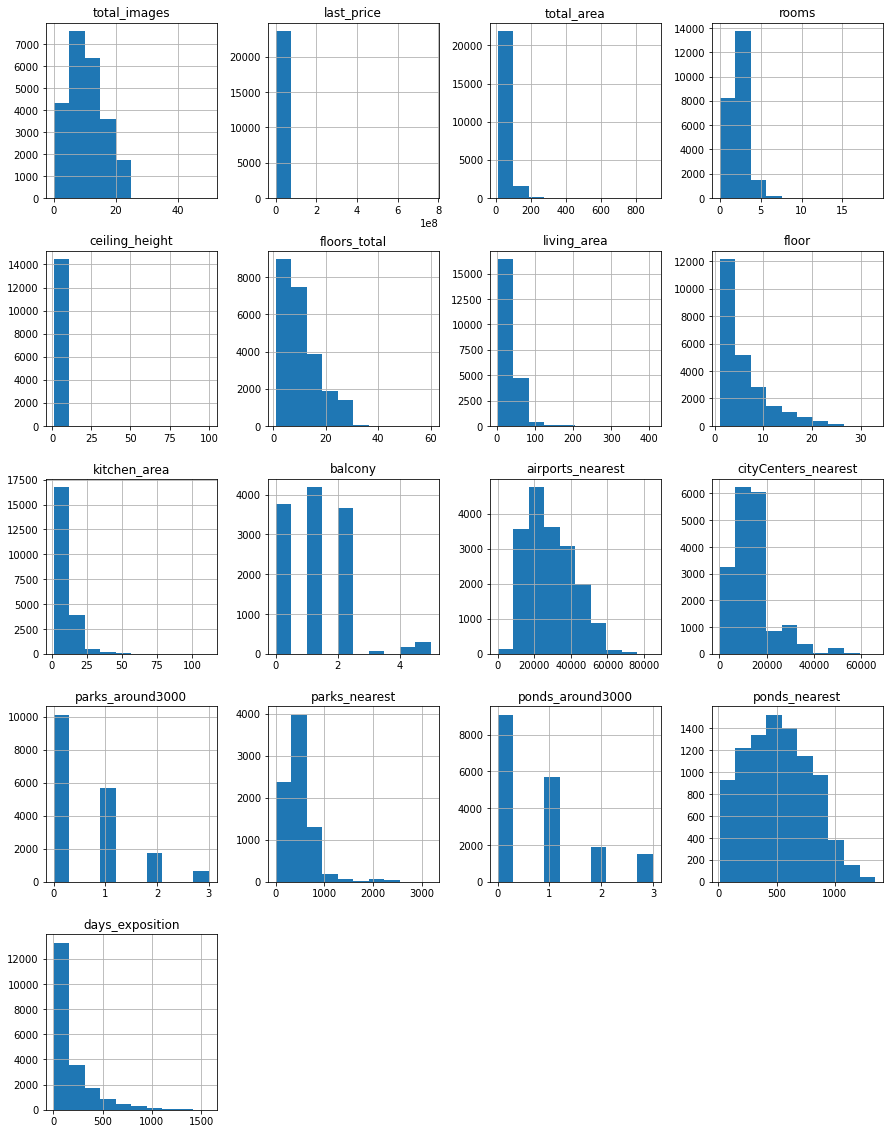

In [6]:
data.hist(figsize=(15, 20));

**Можно отметить, что:**
* В некоторых столбцах с данными имеются пропуски
* На гистограммах по отдельно взятым столбцам видно длинные "хвосты", что говорит о наличии выбросов и аномалий.
* Для дальнейшей работы с данными требуется изменить их тип на более пригодный для совершения арифметических операций.

### Предобработка данных

**Проверяю данные на наличие пропусков в каждом отдельном столбце:**

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Сheck
# Пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

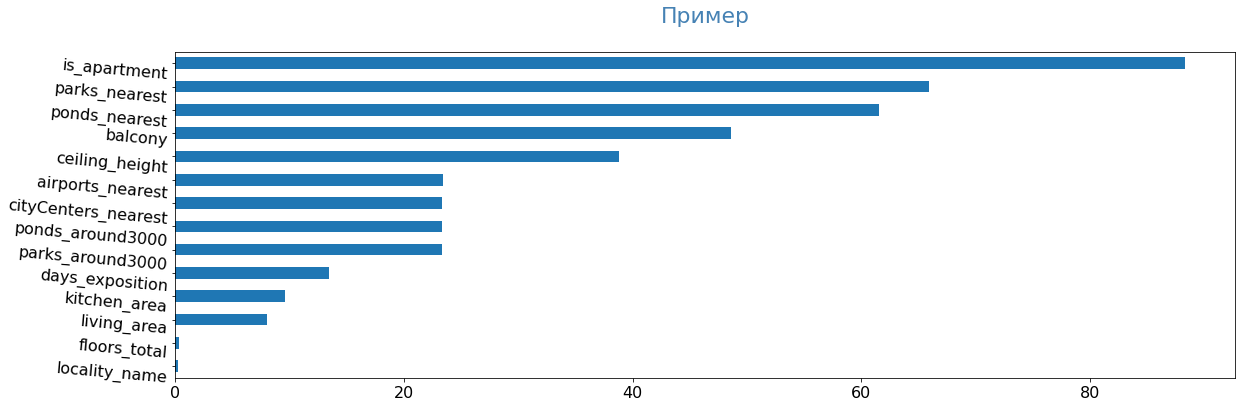

In [9]:
pass_value_barh(data)

**Заменяю пропуски на подходящие по смыслу значения:**

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

* Заполняю пропуски в living_area медианными значениями в зависимости от количества комнат.

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Проверяю как заменились пропущенные значения на булевы в столбце "Апартаменты":**

In [12]:
data['is_apartment'].unique()

array([False,  True])

**Я не заполнил пропуски в следующих столбцах, так как логичную замену предложить невозможно:**

Причиной возникновения пропусков в этих столбцах мог послужить человеческий фактор:

* ceiling_height 
* floors_total
* kitchen_area
* locality_name

Причиной возникновения пропусков в этих столбцах мог послужить технический сбой:

* airports_nearest         
* cityCenters_nearest    
* parks_around3000         
* parks_nearest           
* ponds_around3000        
* ponds_nearest          
* days_exposition   



**Проверяю объём датафрейма:**

In [13]:
data.shape

(23699, 22)

**В таблице 22 столбца и 23699 строк**

In [14]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Привожу данные к более человекочитаемому и подходящему для арифметических операций виду:**

In [15]:
columns_to_replace = ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in columns_to_replace:
    data[column] = data[column].astype(float)

In [16]:
columns_to_replace = ['last_price', 'balcony']
for column in columns_to_replace:
    data[column] = data[column].astype(int)

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Нахожу коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади:**

In [19]:
area_kof = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull()== False]['living_area'].mean() 

**Заполняю пропуски отношением общей площади к коэффициенту соотношения средней общей площади к среднему жилой площади:**

In [20]:
data['living_area'] = data['living_area'].fillna(data['total_area']/area_kof)

**Проверяю данные после изменения их типа:**

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
display(data.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000,35.30,2018-02-28,1,2.86,15.00,16.30,4,False,False,False,9.10,2,Санкт-Петербург,17284.00,16081.00,1.00,353.00,2.00,652.00,29.00
23690,3,5500000,52.00,2018-07-19,2,NaN,5.00,31.00,2,False,False,False,6.00,0,Санкт-Петербург,20151.00,6263.00,1.00,300.00,0.00,NaN,15.00
23691,11,9470000,72.90,2016-10-13,2,2.75,25.00,40.30,7,False,False,False,10.60,1,Санкт-Петербург,19424.00,4489.00,0.00,NaN,1.00,806.00,519.00
23692,2,1350000,30.00,2017-07-07,1,NaN,5.00,17.50,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
23693,9,4600000,62.40,2016-08-05,3,2.60,9.00,40.00,8,False,False,False,8.00,0,Петергоф,45602.00,34104.00,1.00,352.00,1.00,675.00,239.00
23694,9,9700000,133.81,2017-03-21,3,3.70,5.00,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5.00,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000,56.70,2018-02-11,2,NaN,3.00,29.70,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.00,44.01,12,False,False,False,23.30,2,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000,32.30,2017-07-21,1,2.50,5.00,12.30,1,False,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.head(4).T

,0,1,2,3
total_images,20,7,10,0
last_price,13000000,3350000,5196000,64900000
total_area,108.00,40.40,56.00,159.00
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00
rooms,3,1,2,3
ceiling_height,2.70,NaN,NaN,NaN
floors_total,16.00,11.00,5.00,14.00
living_area,51.00,18.60,34.30,91.18
floor,8,1,4,9
is_apartment,False,False,False,False


**Проверяю типы данных после их изменения:**

In [24]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

* Из-за наличия пропусков, логичную замену которым предложить невозможно, привести данные к целочисленным значениям во всех подходящих для этого столбцах не вышло.

**Произвожу проверку на корректность значений площадей:**

In [26]:
# Смотрю размер DataFrame
data.shape

(23699, 22)

In [27]:
# Изучаю DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

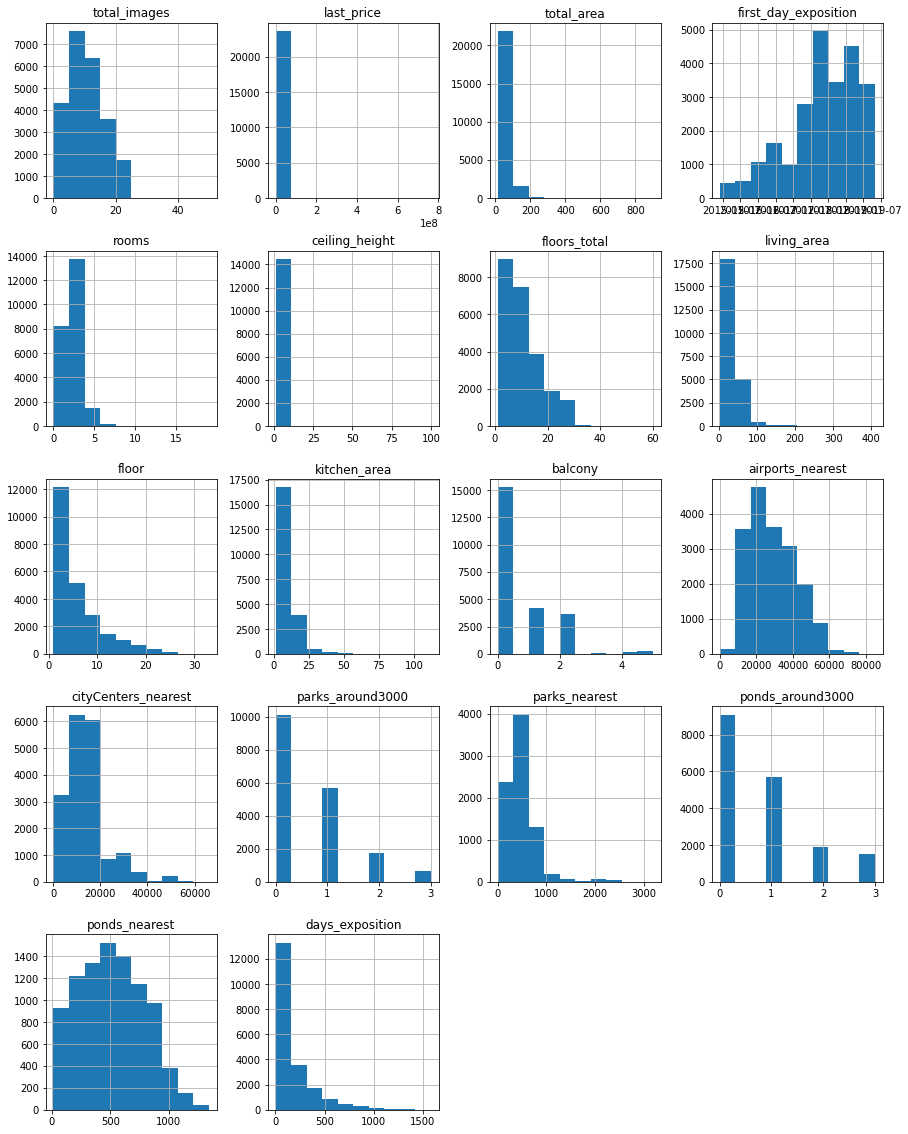

In [28]:
data.hist(figsize=(15, 20));

### Поиск дубликатов:

In [29]:
data['locality_name'].duplicated().sum()


23334

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
data['locality_name'].nunique()

364

**Убираем тип населённого пункта:**

In [32]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [33]:
data['locality_name'] = data['locality_name'].replace(['село ', 'городской поселок', 'посёлок', 'деревня', 'коттеджный', 'станции', 'садовое товарищество', 'городского типа', 'поселок', 'садоводческое некоммерческое товарищество', 'при железнодорожной'], '', regex=True)

**Убираем всё в названии населённого пункта до заглавной буквы:**

In [34]:
data['locality_name'] = data['locality_name'].str.replace(r"^(?![А-Я]).+?(?=[А-Я])", "", regex=True)

In [35]:
data['locality_name'].nunique()

305

**Проверяем очищенные от дубликатов данные:**

In [36]:
list(data['locality_name'].sort_values(ascending=False).unique())

['Янино-1',
 'Ям-Тесово',
 'Яльгелево',
 'Ялгино',
 'Юкки',
 'Щеглово',
 'Шушары',
 'Шум',
 'Шугозеро',
 'Шпаньково',
 'Шлиссельбург',
 'Чудской Бор',
 'Цвылево',
 'Цвелодубово',
 'Хязельки',
 'Хапо-Ое',
 'Форт Красная Горка',
 'Форносово',
 'Федоровское',
 'Фалилеево',
 'Ушаки',
 'Усть-Луга',
 'Усть-Ижора',
 'Ульяновка',
 'Углово',
 'Трубников Бор',
 'Тосно',
 'Торфяное',
 'Торошковичи',
 'Торосово',
 'Торковичи',
 'Токсово',
 'Тойворово',
 'Тихковицы',
 'Тихвин',
 'Тесово-4',
 'Терпилицы',
 'Терволово',
 'Тельмана',
 'Тарасово',
 'Тайцы',
 'Сясьстрой',
 'Сяськелево',
 'Счастье',
 'Суходолье',
 'Суоранда',
 'Сумино',
 'Суйда',
 'Стрельна',
 'Стеклянный',
 'Старые Бегуницы',
 'Старосиверская',
 'Старополье',
 'Старое Хинколово',
 'Старая Пустошь',
 'Старая Малукса',
 'Старая Ладога',
 'Старая',
 'Сосновый Бор',
 'Сосново',
 'Совхозный',
 'Советский',
 'Снегиревка',
 'Сланцы',
 'Синявино',
 'Сижно',
 'Сиверский',
 'Сестрорецк',
 'Сертолово',
 'Серебрянский',
 'Семрино',
 'Семиозерье',
 

**Поиск аномальных значений:**

In [37]:
data.shape

(23699, 22)

<AxesSubplot:>

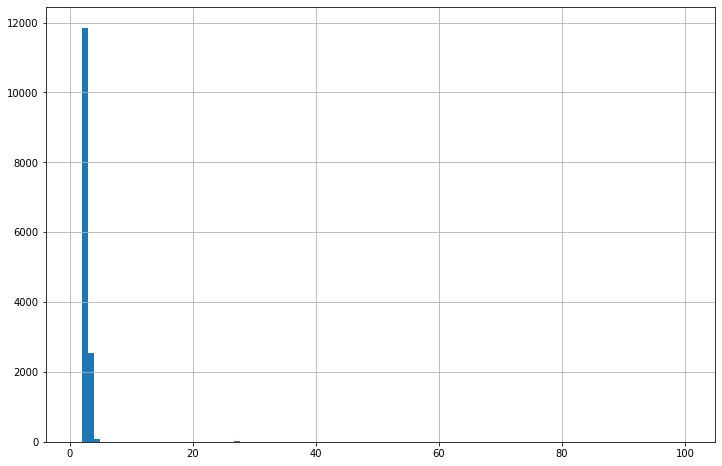

In [38]:
data['ceiling_height'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

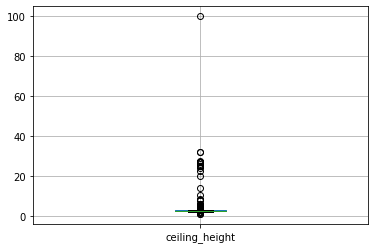

In [39]:
data.boxplot('ceiling_height')

In [40]:
data['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

In [41]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

**В столбце ceiling_height указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.**

In [42]:
for i in data['ceiling_height']:
    if i >= 9:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})

In [43]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([10.  ,  8.3 ,  8.  ,  6.  ,  5.8 ,  5.6 ,  5.5 ,  5.3 ,  5.2 ,
        5.  ,  4.9 ,  4.8 ,  4.7 ,  4.65,  4.5 ,  4.45,  4.4 ,  4.37,
        4.3 ,  4.25,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,  4.06,  4.  ,
        3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,  3.85,  3.84,
        3.83,  3.82,  3.8 ,  3.78,  3.76,  3.75,  3.7 ,  3.69,  3.68,
        3.67,  3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,  3.58,  3.57,
        3.56,  3.55,  3.54,  3.53,  3.52,  3.51,  3.5 ,  3.49,  3.48,
        3.47,  3.46,  3.45,  3.44,  3.43,  3.42,  3.4 ,  3.39,  3.38,
        3.37,  3.36,  3.35,  3.34,  3.33,  3.32,  3.31,  3.3 ,  3.29,
        3.28,  3.27,  3.26,  3.25,  3.24,  3.23,  3.22,  3.21,  3.2 ,
        3.18,  3.17,  3.16,  3.15,  3.14,  3.13,  3.12,  3.11,  3.1 ,
        3.09,  3.08,  3.07,  3.06,  3.05,  3.04,  3.03,  3.02,  3.01,
        3.  ,  2.99,  2.98,  2.97,  2.96,  2.95,  2.94,  2.93,  2.92,
        2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,  2.84,  2.83,
        2.82,  2.81,

In [44]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([10.  ,  8.3 ,  8.  ,  6.  ,  5.8 ,  5.6 ,  5.5 ,  5.3 ,  5.2 ,
        5.  ,  4.9 ,  4.8 ,  4.7 ,  4.65,  4.5 ,  4.45,  4.4 ,  4.37,
        4.3 ,  4.25,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,  4.06,  4.  ,
        3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,  3.85,  3.84,
        3.83,  3.82,  3.8 ,  3.78,  3.76,  3.75,  3.7 ,  3.69,  3.68,
        3.67,  3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,  3.58,  3.57,
        3.56,  3.55,  3.54,  3.53,  3.52,  3.51,  3.5 ,  3.49,  3.48,
        3.47,  3.46,  3.45,  3.44,  3.43,  3.42,  3.4 ,  3.39,  3.38,
        3.37,  3.36,  3.35,  3.34,  3.33,  3.32,  3.31,  3.3 ,  3.29,
        3.28,  3.27,  3.26,  3.25,  3.24,  3.23,  3.22,  3.21,  3.2 ,
        3.18,  3.17,  3.16,  3.15,  3.14,  3.13,  3.12,  3.11,  3.1 ,
        3.09,  3.08,  3.07,  3.06,  3.05,  3.04,  3.03,  3.02,  3.01,
        3.  ,  2.99,  2.98,  2.97,  2.96,  2.95,  2.94,  2.93,  2.92,
        2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,  2.84,  2.83,
        2.82,  2.81,

In [45]:
data.shape[0]

23699

**Заполним пропуски в столбце медианным значением:**

In [46]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**Очистим данные от выбросов:**

In [47]:
data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 4)]  

<AxesSubplot:>

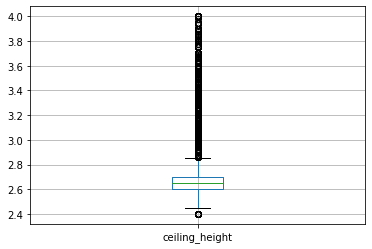

In [48]:
data.boxplot('ceiling_height')

<AxesSubplot:>

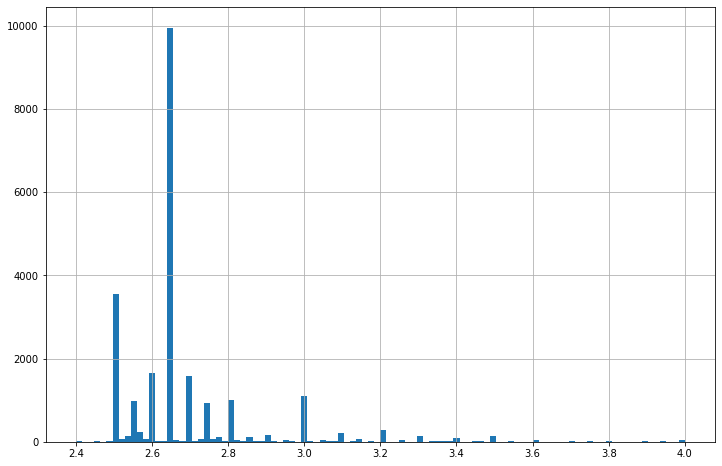

In [49]:
data['ceiling_height'].hist(bins=100, figsize=(12, 8))

In [50]:
data.shape

(23623, 22)

### Очищаю столбцы датафрейма от аномальных значений:

**Выявляю по графикам аномальные значения и удаляю их из датафрейма методом query(), перед этим заполнив пропуски медианными значениями. После удаления аномальных значений снова проверяю графики на наличие выбросов.**

<AxesSubplot:>

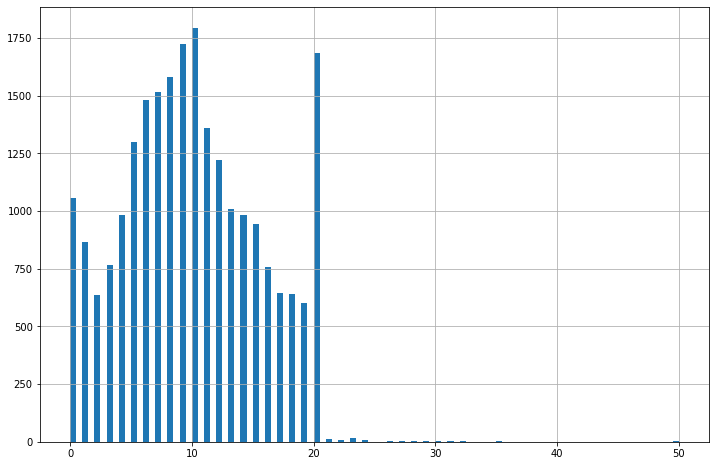

In [51]:
data['total_images'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

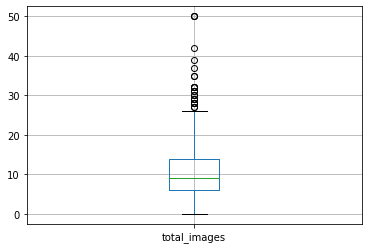

In [52]:
data.boxplot('total_images')

**Удалим строки с количеством фотографи больше 20:**

In [53]:
data['total_images'] = data['total_images'].fillna(data['total_images'].median())

In [54]:
data = data.query('total_images <= 20  and total_images.notnull()')

In [55]:
# check
data.shape[0]

23548

<AxesSubplot:>

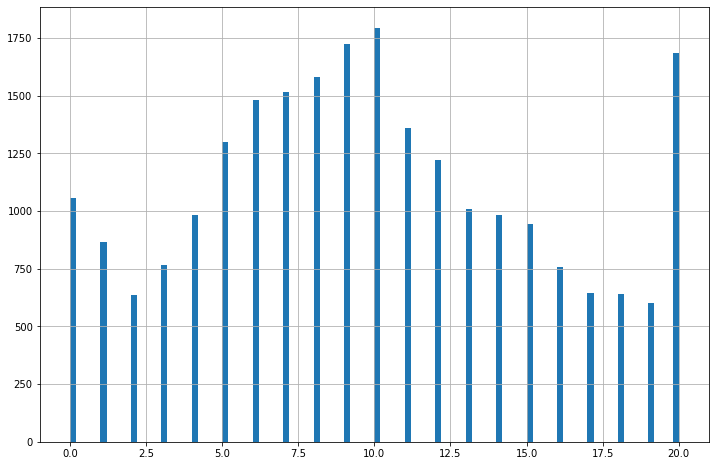

In [56]:
data['total_images'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

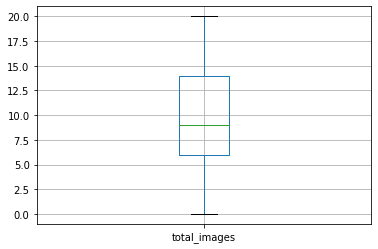

In [57]:
data.boxplot('total_images')

In [58]:
data.shape

(23548, 22)

<AxesSubplot:>

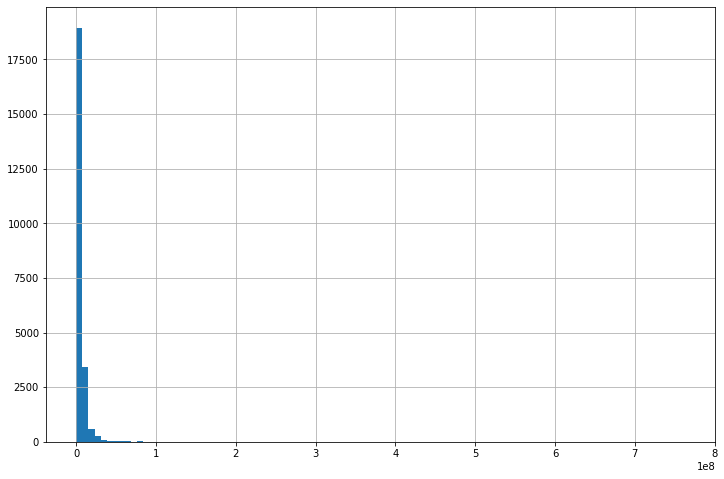

In [59]:
data['last_price'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

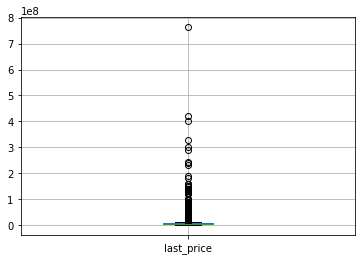

In [60]:
data.boxplot('last_price')

In [61]:
data['last_price'] = data['last_price'].fillna(data['last_price'].median())

In [62]:
data = data.query('(800000 <= last_price <= 50000000) and (last_price.notnull())')

<AxesSubplot:>

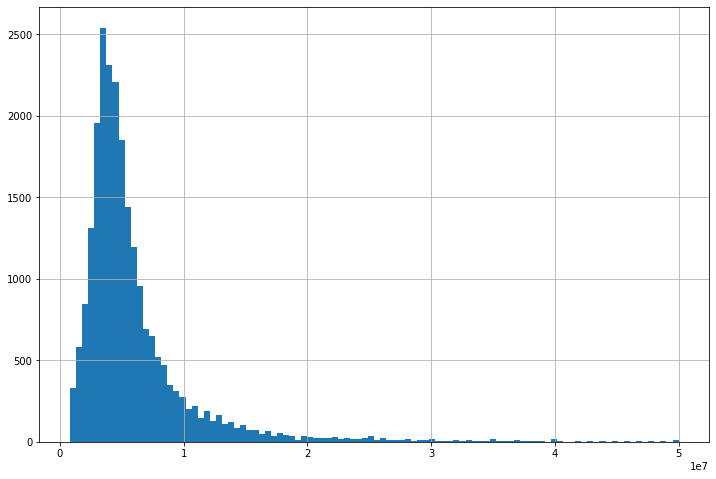

In [63]:
data['last_price'].hist(bins=100, figsize=(12, 8))

In [64]:
data.shape

(23313, 22)

<AxesSubplot:>

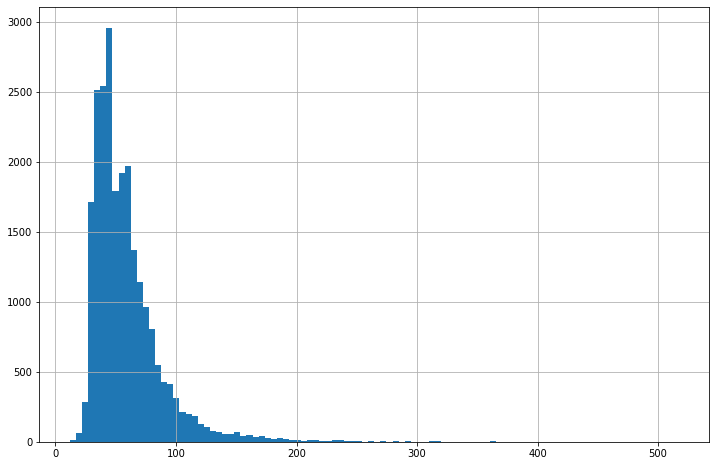

In [65]:
data['total_area'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

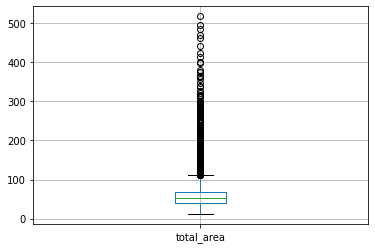

In [66]:
data.boxplot('total_area')

In [67]:
data = data.query('(23 <= total_area <= 260) and (total_area.notnull())')

<AxesSubplot:>

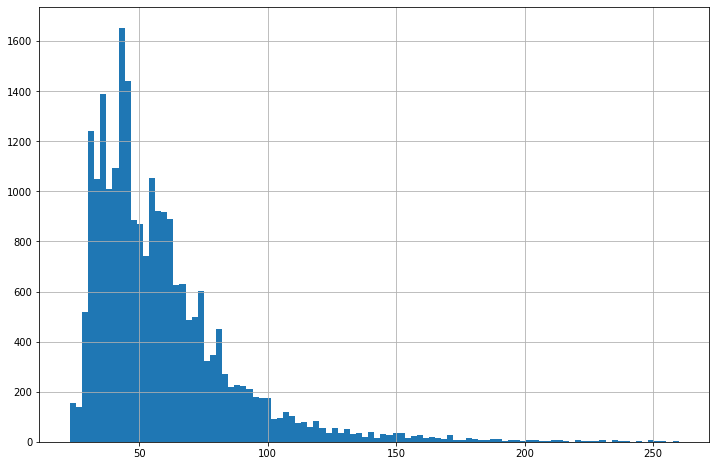

In [68]:
data['total_area'].hist(bins=100, figsize=(12, 8))

In [69]:
data.shape

(23181, 22)

In [70]:
# check
import matplotlib.pyplot as plt

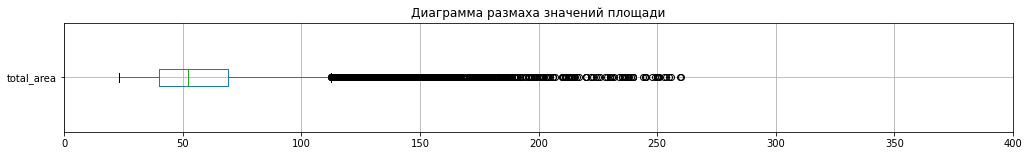

In [71]:
# check
# для примера горизонтальный вид диаграммы размаха ✔️

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

<AxesSubplot:>

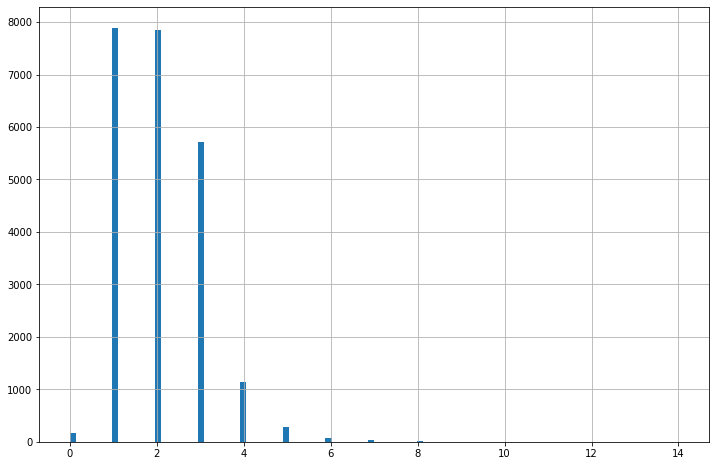

In [72]:
data['rooms'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

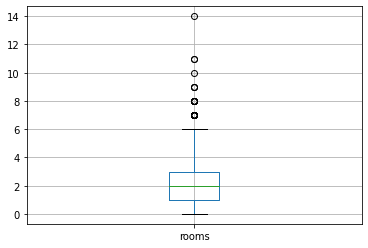

In [73]:
data.boxplot('rooms')

In [74]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23181 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23181 non-null  int64         
 1   last_price            23181 non-null  int64         
 2   total_area            23181 non-null  float64       
 3   first_day_exposition  23181 non-null  datetime64[ns]
 4   rooms                 23181 non-null  int64         
 5   ceiling_height        23181 non-null  float64       
 6   floors_total          23096 non-null  float64       
 7   living_area           23181 non-null  float64       
 8   floor                 23181 non-null  int64         
 9   is_apartment          23181 non-null  bool          
 10  studio                23181 non-null  bool          
 11  open_plan             23181 non-null  bool          
 12  kitchen_area          21028 non-null  float64       
 13  balcony         

In [75]:
data = data.query('rooms <= 6  and rooms.notnull()')

<AxesSubplot:>

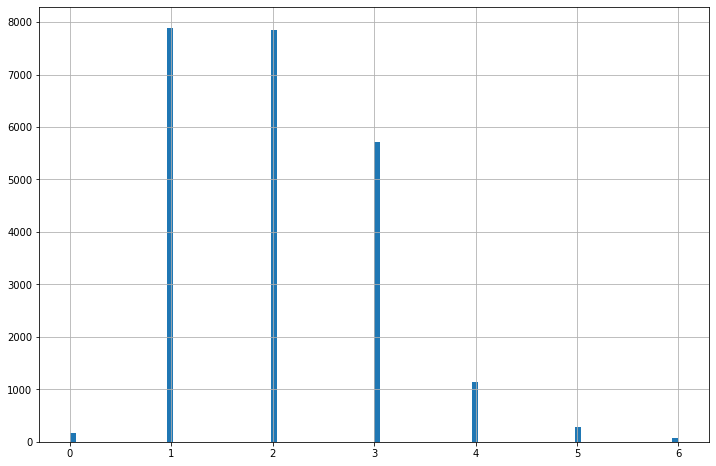

In [76]:
data['rooms'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

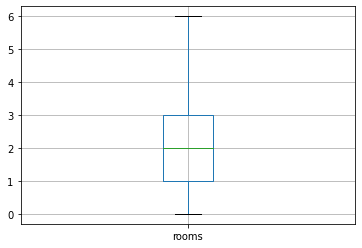

In [77]:
data.boxplot('rooms')

In [78]:
data.shape

(23129, 22)

<AxesSubplot:>

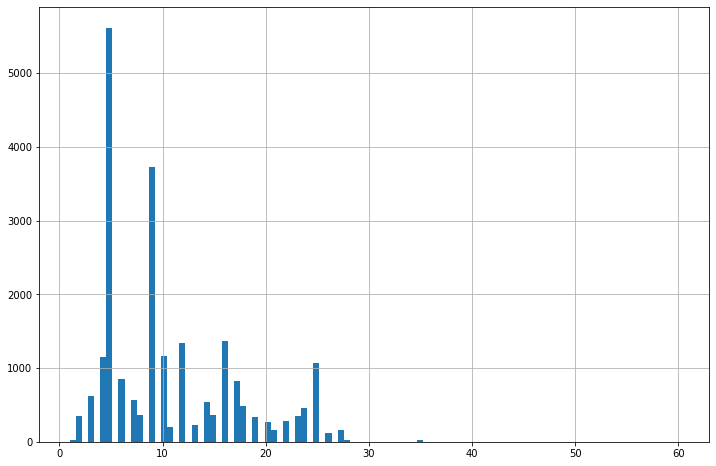

In [79]:
data['floors_total'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

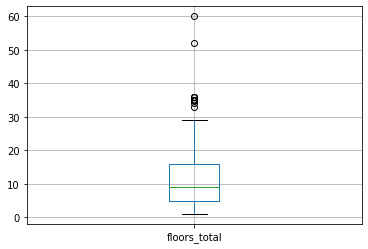

In [80]:
data.boxplot('floors_total')

In [81]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [82]:
data = data.query('floors_total <= 27 and floors_total.notnull()')

In [83]:
# check
data.shape[0]

23076

<AxesSubplot:>

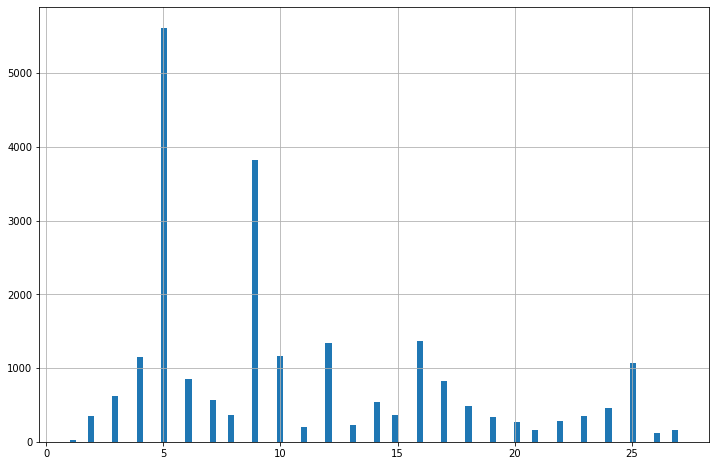

In [84]:
data['floors_total'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

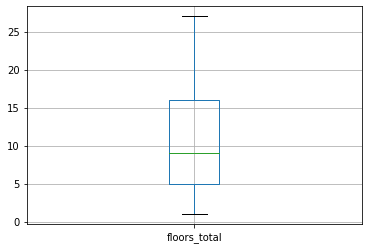

In [85]:
data.boxplot('floors_total')

<AxesSubplot:>

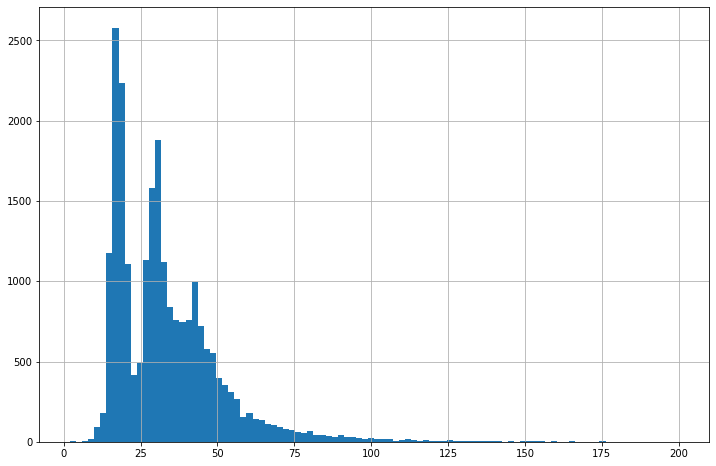

In [86]:
data['living_area'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

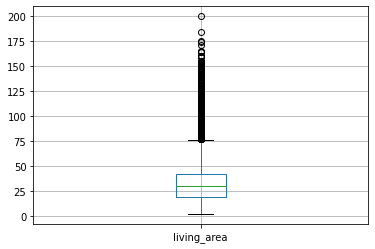

In [87]:
data.boxplot('living_area')

In [88]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [89]:
# check
data.shape[0]

23076

In [90]:
data = data.query('12 <= living_area <= 180 and living_area.notnull()')

In [91]:
# check
data.shape[0]

22958

<AxesSubplot:>

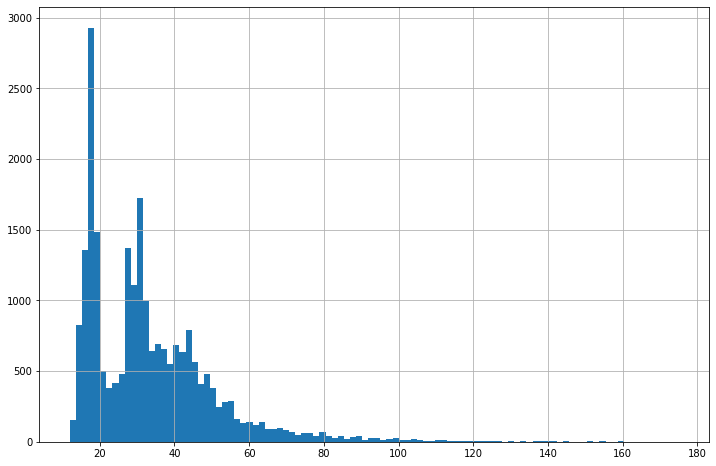

In [92]:
data['living_area'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

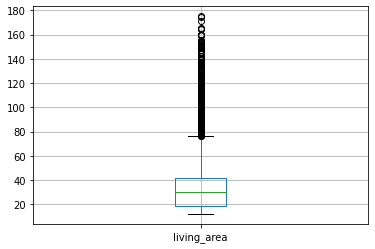

In [93]:
data.boxplot('living_area')

<AxesSubplot:>

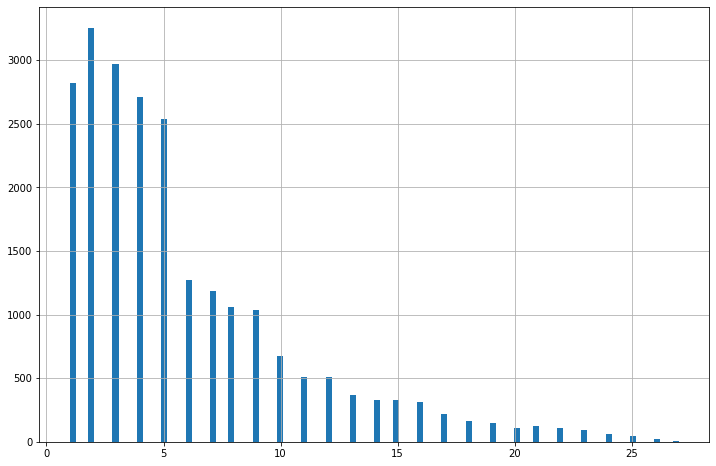

In [94]:
data['floor'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

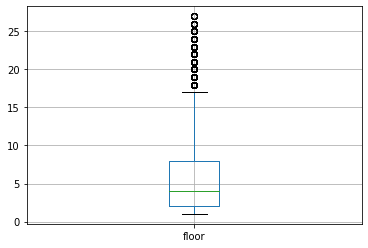

In [95]:
data.boxplot('floor')

In [96]:
data.shape

(22958, 22)

<AxesSubplot:>

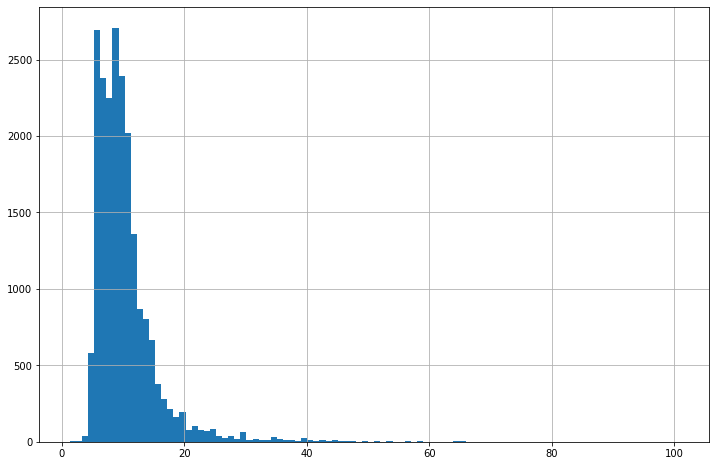

In [97]:
data['kitchen_area'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

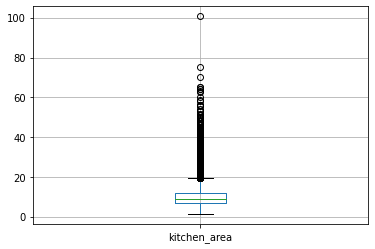

In [98]:
data.boxplot('kitchen_area')

In [99]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [100]:
# check
data.shape[0]

22958

In [101]:
data = data.query('5 <= kitchen_area <= 38 and kitchen_area.notnull()')

In [102]:
# check
data.shape[0]

22745

<AxesSubplot:>

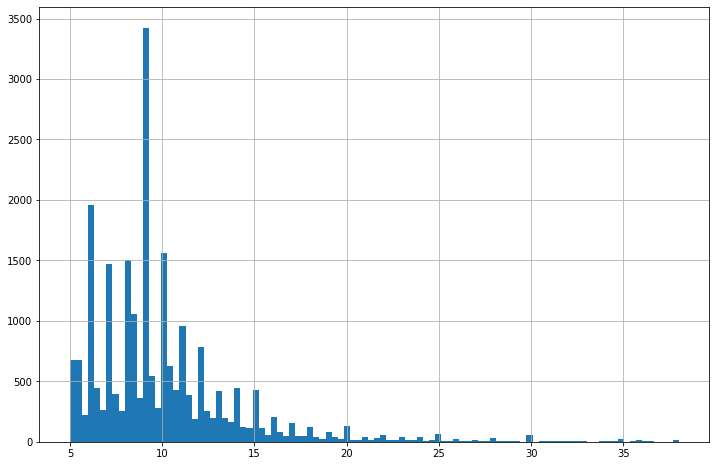

In [103]:
data['kitchen_area'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

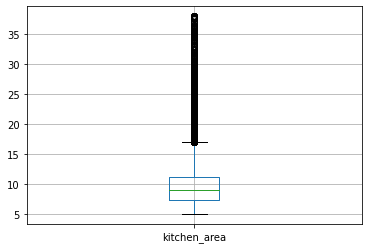

In [104]:
data.boxplot('kitchen_area')

<AxesSubplot:>

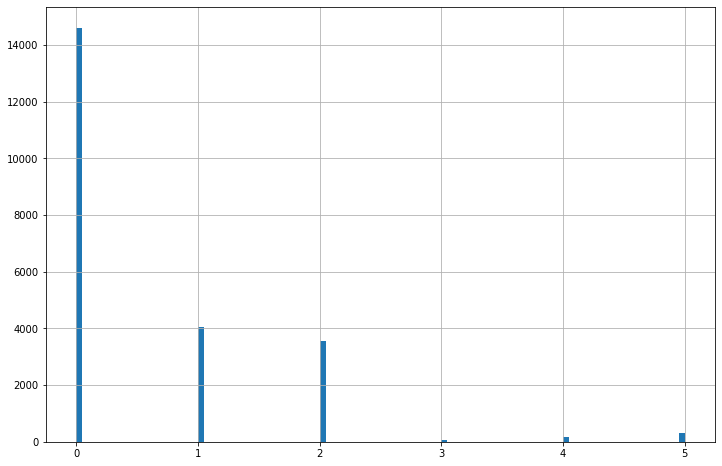

In [105]:
data['balcony'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

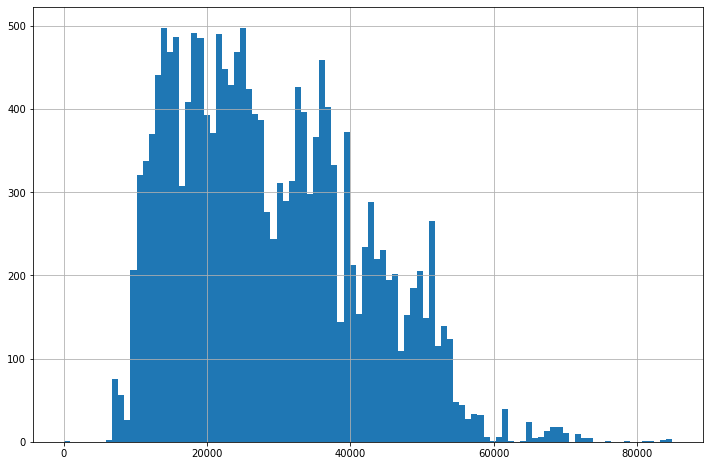

In [106]:
data['airports_nearest'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

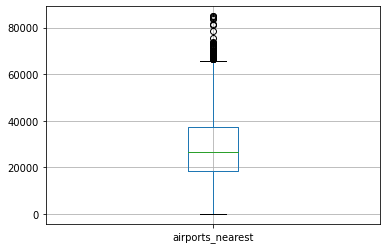

In [107]:
data.boxplot('airports_nearest')

<AxesSubplot:>

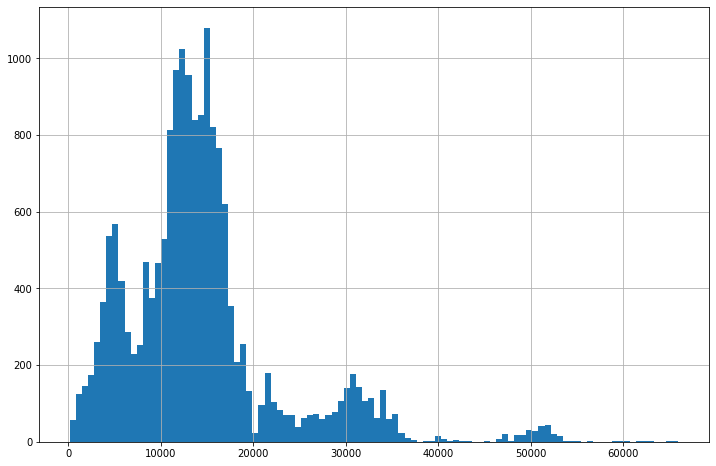

In [108]:
data['cityCenters_nearest'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

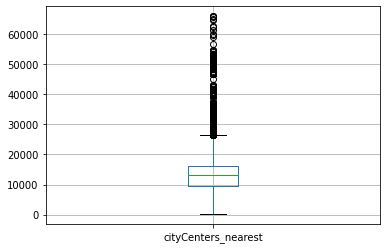

In [109]:
data.boxplot('cityCenters_nearest')

<AxesSubplot:>

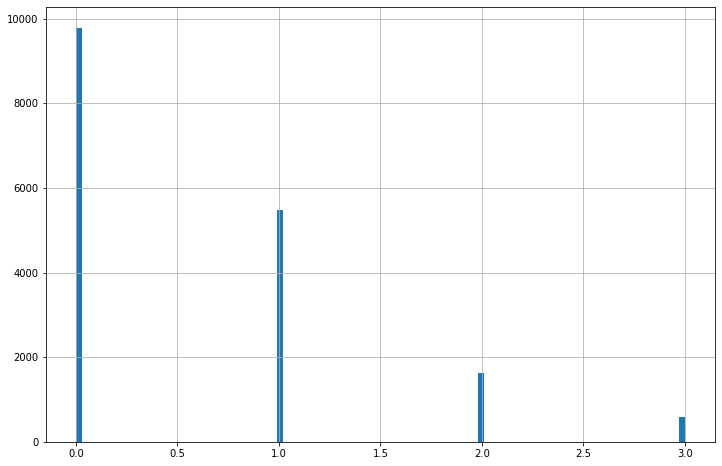

In [110]:
data['parks_around3000'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

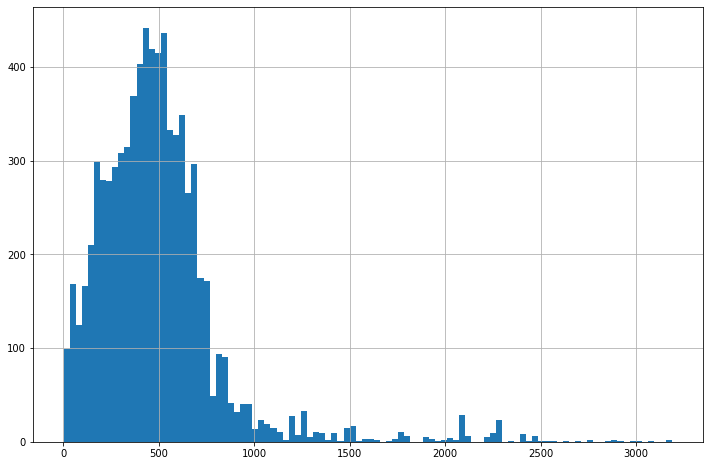

In [111]:
data['parks_nearest'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

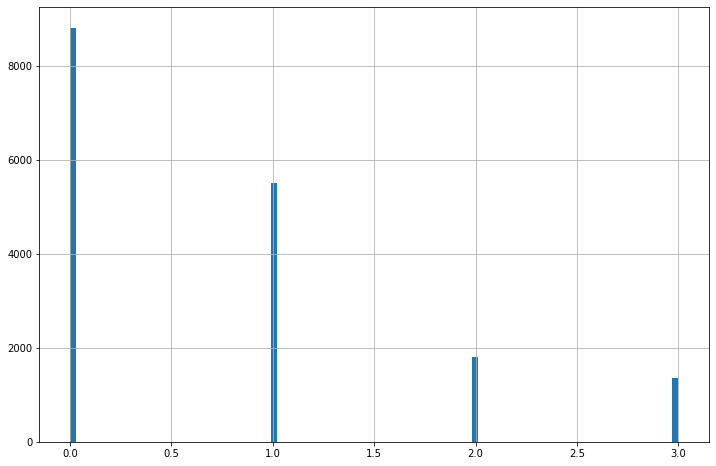

In [112]:
data['ponds_around3000'].hist(bins=100, figsize=(12, 8))

<AxesSubplot:>

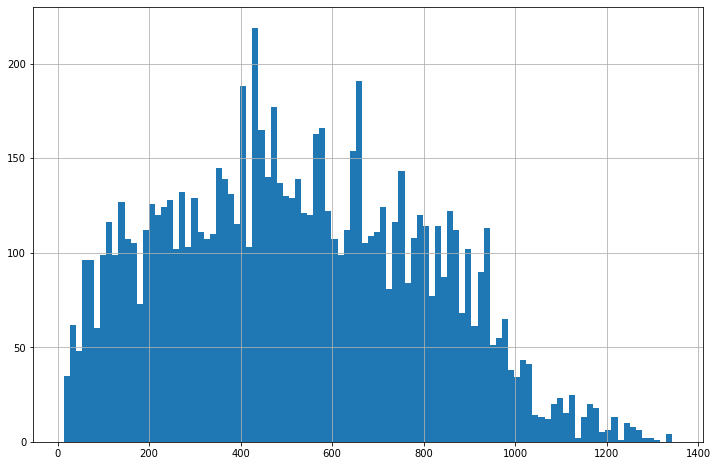

In [113]:
data['ponds_nearest'].hist(bins=100, figsize=(12, 8))

In [114]:
data.shape

(22745, 22)

<AxesSubplot:>

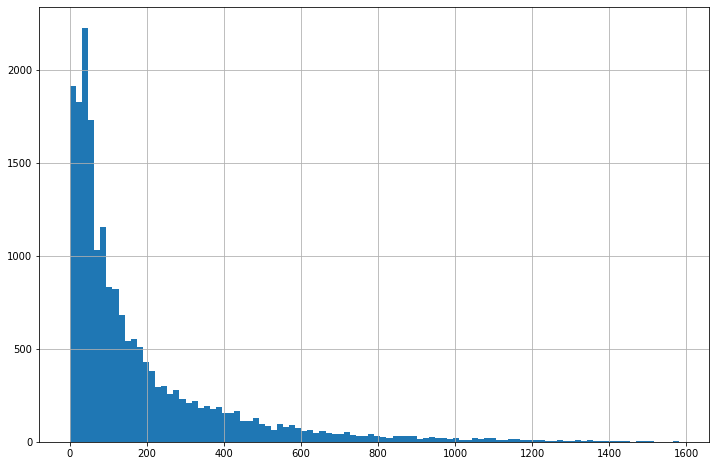

In [115]:
data['days_exposition'].hist(bins=100, figsize=(12, 8))

In [117]:
data = data[(data['days_exposition'] <= 1095) | (data['days_exposition'].isna())]

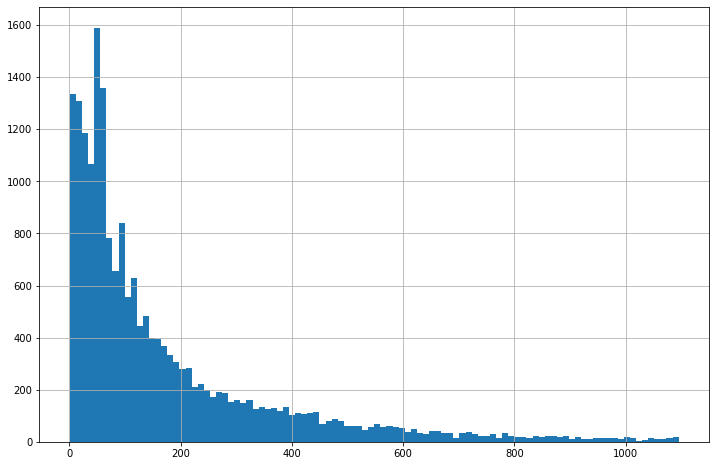

In [118]:
data['days_exposition'].hist(bins=100, figsize=(12, 8));

In [119]:
data.shape

(22584, 22)

**Отфильтровалась 161 запись.**

In [120]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22584 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22584 non-null  int64         
 1   last_price            22584 non-null  int64         
 2   total_area            22584 non-null  float64       
 3   first_day_exposition  22584 non-null  datetime64[ns]
 4   rooms                 22584 non-null  int64         
 5   ceiling_height        22584 non-null  float64       
 6   floors_total          22584 non-null  float64       
 7   living_area           22584 non-null  float64       
 8   floor                 22584 non-null  int64         
 9   is_apartment          22584 non-null  bool          
 10  studio                22584 non-null  bool          
 11  open_plan             22584 non-null  bool          
 12  kitchen_area          22584 non-null  float64       
 13  balcony         

In [121]:
# check
data.shape[0]

22584

<AxesSubplot:>

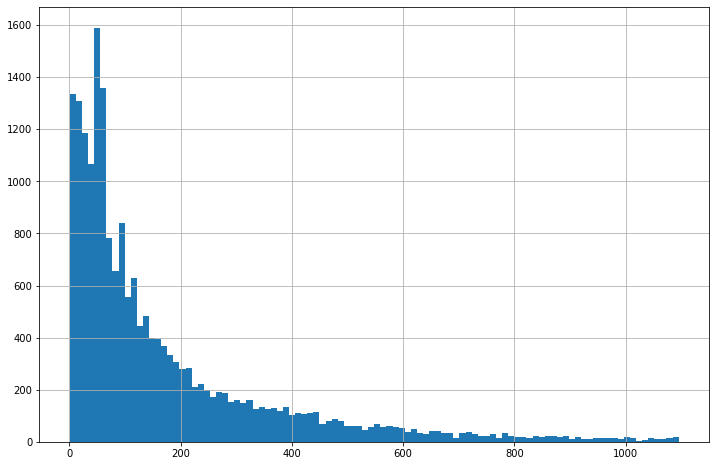

In [122]:
data['days_exposition'].hist(bins=100, figsize=(12, 8))

**Выведем очищенную от аномальных значений таблицу на экран**

In [123]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
5,10,2890000,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
7,5,7915000,71.60,2019-04-18,2,2.65,24.00,41.06,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00
10,5,5050000,39.60,2017-11-16,1,2.67,12.00,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00
11,9,3300000,44.00,2018-08-27,2,2.65,5.00,31.00,4,False,False,False,6.00,1,Ломоносов,48252.00,51677.00,0.00,NaN,0.00,NaN,7.00
12,10,3890000,54.00,2016-06-30,2,2.65,5.00,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00


In [125]:
data['floors_total'] = data['floors_total'].astype(int)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22584 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22584 non-null  int64         
 1   last_price            22584 non-null  int64         
 2   total_area            22584 non-null  float64       
 3   first_day_exposition  22584 non-null  datetime64[ns]
 4   rooms                 22584 non-null  int64         
 5   ceiling_height        22584 non-null  float64       
 6   floors_total          22584 non-null  int64         
 7   living_area           22584 non-null  float64       
 8   floor                 22584 non-null  int64         
 9   is_apartment          22584 non-null  bool          
 10  studio                22584 non-null  bool          
 11  open_plan             22584 non-null  bool          
 12  kitchen_area          22584 non-null  float64       
 13  balcony         

In [127]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,584.00","22,584.00","22,584.00","19,563.00","22,584.00","22,584.00","22,584.00","22,584.00","22,584.00"
min,0.00,23.00,2.40,1.00,"800,000.00",12.00,5.00,1.00,1.00
max,6.00,260.00,4.00,"1,095.00","50,000,000.00",175.00,38.00,27.00,27.00


In [128]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,584.00","22,584.00","22,584.00","19,563.00","22,584.00","22,584.00","22,584.00","22,584.00","22,584.00"
min,0.00,23.00,2.40,1.00,"800,000.00",12.00,5.00,1.00,1.00
max,6.00,260.00,4.00,"1,095.00","50,000,000.00",175.00,38.00,27.00,27.00


In [129]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,584.00","22,584.00","22,584.00","19,563.00","22,584.00","22,584.00","22,584.00","22,584.00","22,584.00"
min,0.00,23.00,2.40,1.00,"800,000.00",12.00,5.00,1.00,1.00
max,6.00,260.00,4.00,"1,095.00","50,000,000.00",175.00,38.00,27.00,27.00
median,2.00,52.00,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00


In [130]:
# Check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# Если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [131]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


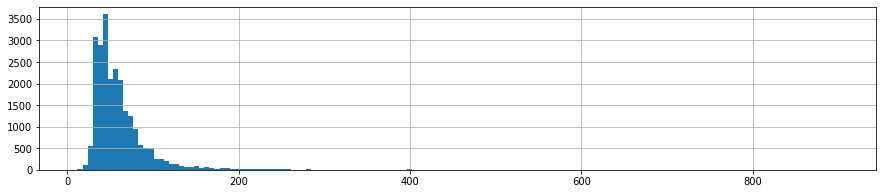

In [132]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

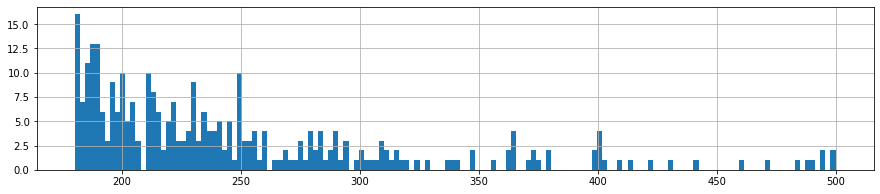

In [133]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

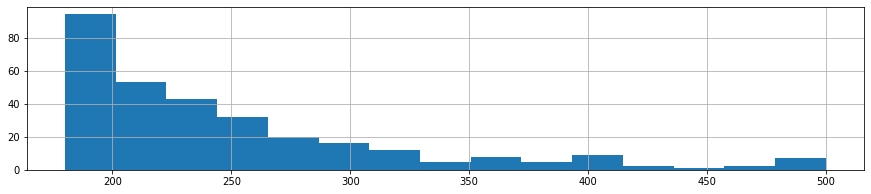

In [134]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

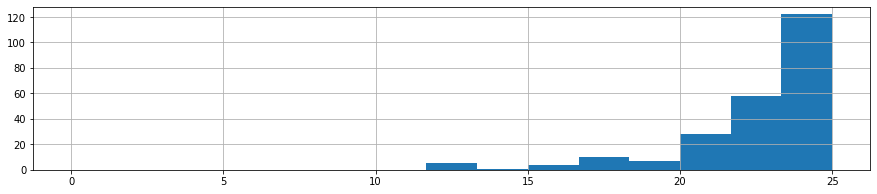

In [135]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [136]:
data.shape

(22584, 22)

In [137]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,23.50,2.45,3.00,"850,000.00",12.00,5.00,1.00,2.00
0.01,1.00,27.00,2.50,4.00,"1,150,000.00",14.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,5.00,160.00,3.50,925.76,"25,800,000.00",97.67,28.00,22.00,26.00
0.9988,6.00,220.00,4.00,"1,078.00","43,000,000.00",140.00,36.00,25.00,27.00


### Посчитаем и добавим в таблицу новые столбцы

**Расчитаем цену одного квадратного метра:**

In [138]:
data['price_one_meter'] = data['last_price']/data['total_area']

In [139]:
data['price_one_meter']

0       120370.37
1        82920.79
2        92785.71
5        95065.79
7       110544.69
           ...   
23694    72490.85
23695    52542.37
23696    44091.71
23697   149511.40
23698    41795.67
Name: price_one_meter, Length: 22584, dtype: float64

**Определим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):**

In [140]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [141]:
data['weekday_exposition']

0        3
1        1
2        3
5        0
7        3
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_exposition, Length: 22584, dtype: int64

**Определим месяц публикации объявления:**

In [142]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [143]:
data['month_exposition']

0         3
1        12
2         8
5         9
7         4
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exposition, Length: 22584, dtype: int64

**Определим год публикации объявления:**

In [144]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [145]:
data['year_exposition']

0        2019
1        2018
2        2015
5        2018
7        2019
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exposition, Length: 22584, dtype: int64

**Определим тип этажа квартиры (значения — «первый», «последний», «другой»):**

In [146]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [147]:
data['floor_type'] = data.apply(floor_type, axis = 1)

In [148]:
data['floor'].unique()

array([ 8,  1,  4,  5, 22, 26,  7,  3,  2, 11, 15,  9, 18,  6, 13, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 24, 23])

In [149]:
data['floor_type']

0        другой
1        первый
2        другой
5        другой
7        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 22584, dtype: object

**Определим расстояние до центра города в километрах (переведём из м в км и округлим до целых значений):**

In [150]:
data['city_centers_nearest_km'] = (data['cityCenters_nearest']/1000).round()

**Заполним пропуски нулями, чтобы привести значения столбца к целым:**

In [151]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].fillna(0).astype(int).round()

**Отсеем значения равные 0, чтобы на них не было пика при анализе:**

In [152]:
# data = data.query('city_centers_nearest_km > 0')

In [153]:
data['city_centers_nearest_km']

0        16
1        19
2        14
5         0
7        12
         ..
23694     4
23695     0
23696     0
23697    10
23698     0
Name: city_centers_nearest_km, Length: 22584, dtype: int64

### Проведите исследовательский анализ данных

**Построим отдельные гистограммы для каждого из параметров:**

In [154]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой,0
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.06,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,87454.76,2,5,2018,другой,0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00,127525.25,3,11,2017,другой,14
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.00,51677.00,0.00,NaN,0.00,NaN,7.00,75000.00,0,8,2018,другой,52
12,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00,72037.04,3,6,2016,последний,0


<AxesSubplot:>

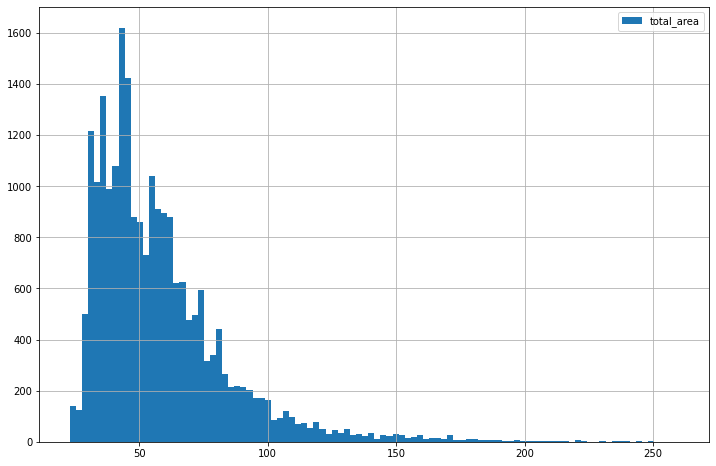

In [155]:
data['total_area'].hist(bins=100, figsize=(12, 8), legend = True)

**Площадь большинства объектов недвижимости колеблется в пределах 30 - 60 квадратных метров. Чем больше площадь квартиры, тем она уникальнее.**

<AxesSubplot:>

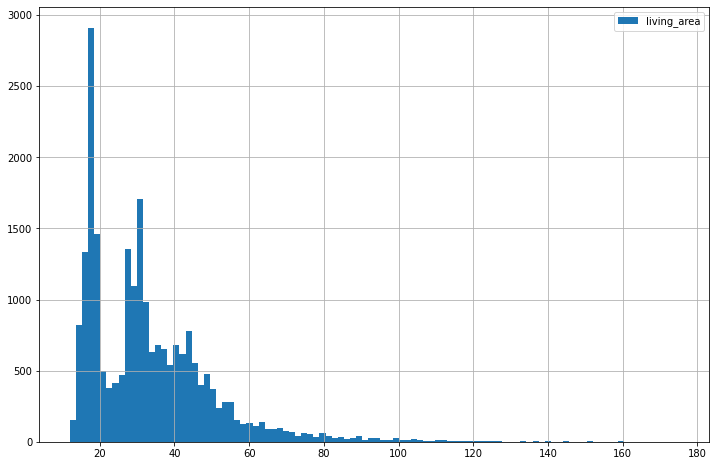

In [156]:
data['living_area'].hist(bins=100, figsize=(12, 8), legend = True)

**График жилой площади квартир имеет 2 пика. Чаще жилая площадь колеблется в пределах от 15 до 55 квадратных метров.**

<AxesSubplot:>

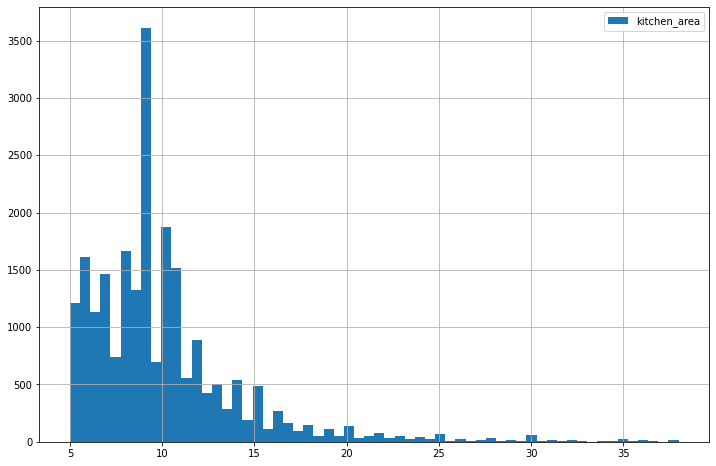

In [157]:
data['kitchen_area'].hist(bins=60, figsize=(12, 8), legend = True)

**Чаще всего встречаются кухни с площадью от 5 до 15 квадратных метров.**

<AxesSubplot:>

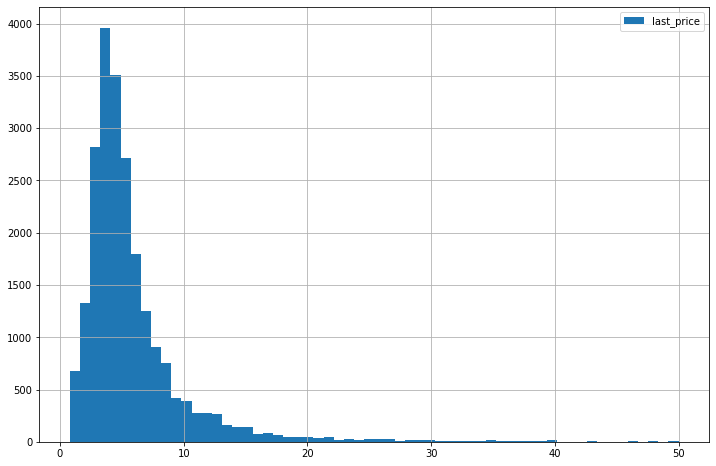

In [158]:
(data['last_price']/1000000).hist(bins=60, figsize=(12, 8), legend = True)

**Чем дешевле квартиры, тем чаще они встречаются.**

<AxesSubplot:>

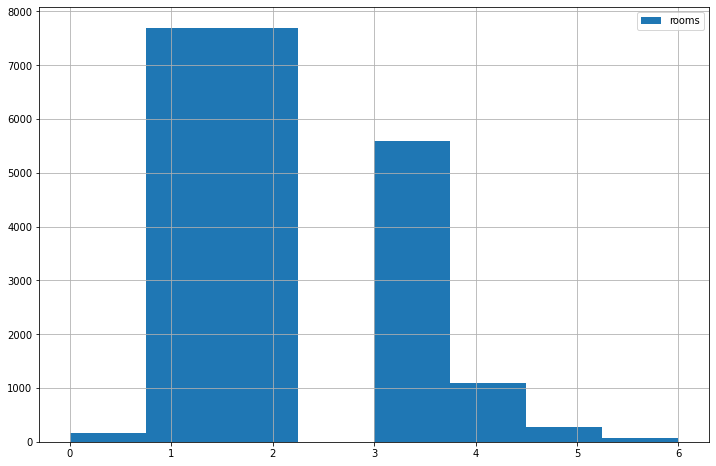

In [159]:
data['rooms'].hist(bins=8, figsize=(12, 8), legend = True)

**Больше всего однокомнатных и двухкомнатных квартир. Квартиры с числом комнат больше 6 встречаются крайне редко.**

<AxesSubplot:>

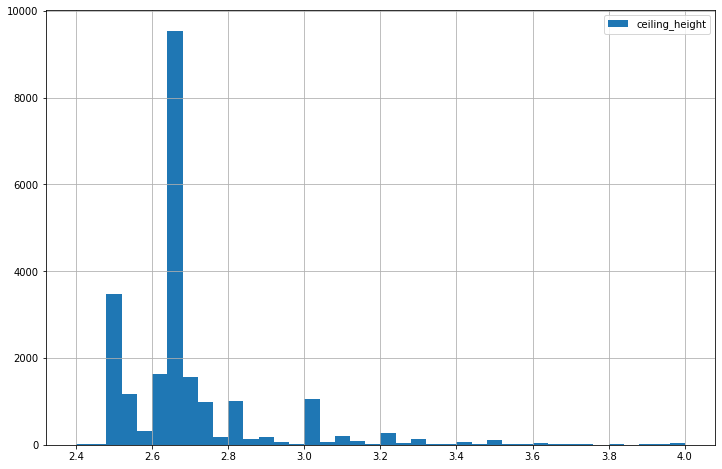

In [160]:
data['ceiling_height'].hist(bins=40, figsize=(12, 8), legend = True)

**Чаще всего встречаются квартиры с высотой потолков 2,7 метра. Высота потолков варьируется от 2,4 до 4-х метров. Есть редкие исключения.**

<AxesSubplot:>

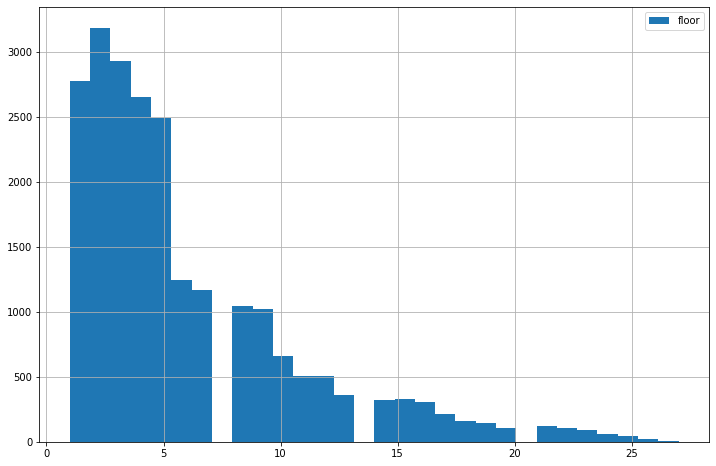

In [161]:
data['floor'].hist(bins=30, figsize=(12, 8), legend = True)

**Больше всего квартир располагаются на этажах от 1-го до 5-го. Квартиры на верхних этажах встречаются реже, чем на нижних.**

<AxesSubplot:>

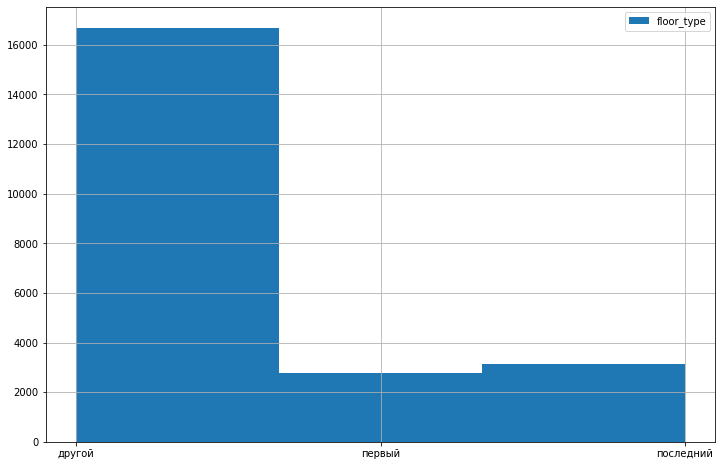

In [162]:
data['floor_type'].hist(bins=3, figsize=(12, 8), legend = True)

**Больше всего квартир располагается не на первом и не на последнем этажах. На последнем этаже квартир всё же немного больше, чем на первом.**

<AxesSubplot:>

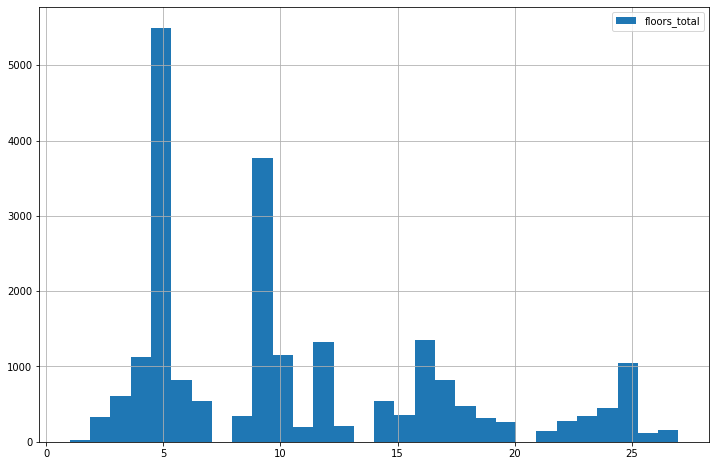

In [163]:
data['floors_total'].hist(bins=30, figsize=(12, 8), legend = True)

**Чаще всего встречаются пяти и девятиэтажные дома.**

<AxesSubplot:>

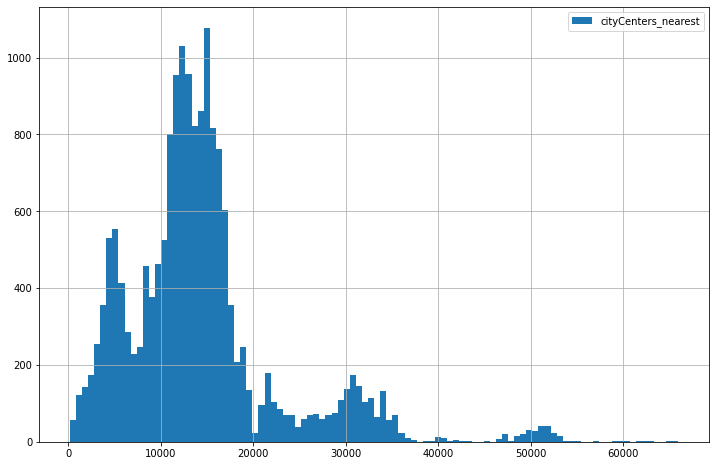

In [164]:
data['cityCenters_nearest'].hist(bins=100, figsize=(12, 8), legend = True)

**Больше всего квартир находятся на расстоянии от 9 до 17-ти километров от центра города. Так же виден пик в 5-ти километрах от центра. С удалением от центра количество недвижимости падает.**

<AxesSubplot:>

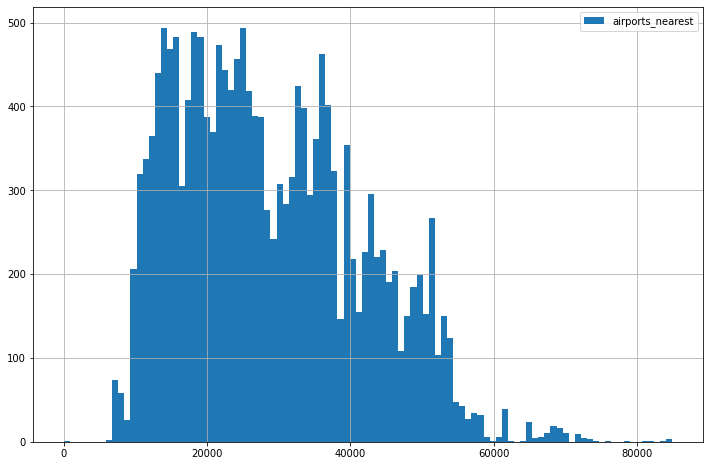

In [165]:
data['airports_nearest'].hist(bins=100, figsize=(12, 8), legend = True)

**Ближе 5-ти километров от аэропорта жилья не найти, зато от 5-ти до 50 километров от него жилья довольно много.**

<AxesSubplot:>

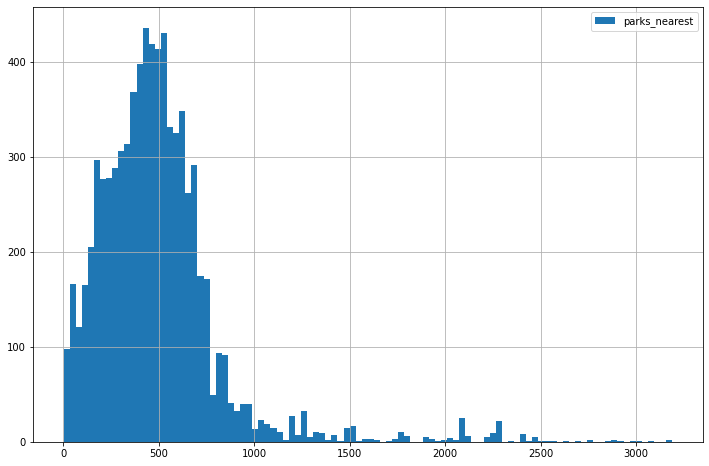

In [166]:
data['parks_nearest'].hist(bins=100, figsize=(12, 8), legend = True)

**Парки в основном располагаются в 500 метрах от жилья.**

<AxesSubplot:>

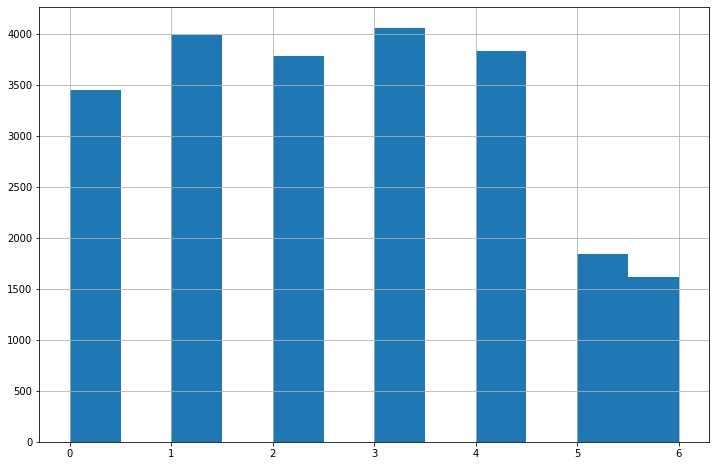

In [167]:
data['weekday_exposition'].hist(bins=12, figsize=(12, 8))

**Чаще объявлениия о продаже недвижимости размещают по будням, чем по выходным. Примерно в 2 раза чаще.**

<AxesSubplot:>

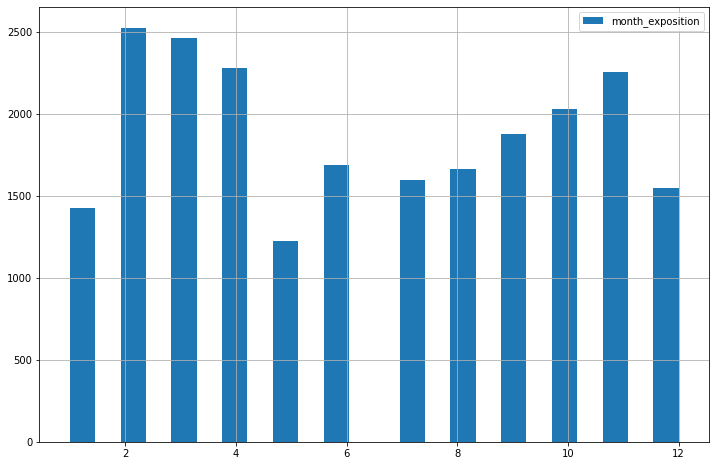

In [168]:
data['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True)

**Меньше всего недвижимости продаётся в декабре, январе и мае. Больше продают в феврале и ноябре.**

In [169]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой,0
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.06,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,87454.76,2,5,2018,другой,0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00,127525.25,3,11,2017,другой,14
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.00,51677.00,0.00,NaN,0.00,NaN,7.00,75000.00,0,8,2018,другой,52
12,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00,72037.04,3,6,2016,последний,0


In [170]:
(
    data[['month_exposition', 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,month_exposition,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,0.00,23.50,2.45,3.00,"850,000.00",12.00,5.00,1.00,2.00
0.01,1.00,1.00,27.00,2.50,4.00,"1,150,000.00",14.00,5.00,1.00,2.00
0.5,6.00,2.00,52.00,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,12.00,5.00,160.00,3.50,925.76,"25,800,000.00",97.67,28.00,22.00,26.00
0.9988,12.00,6.00,220.00,4.00,"1,078.00","43,000,000.00",140.00,36.00,25.00,27.00


In [171]:
(
    data[['month_exposition']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,month_exposition
0.0012,1.00
0.01,1.00
0.5,6.00
0.99,12.00
0.9988,12.00


In [172]:
(
    data[['month_exposition', 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,month_exposition,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,584.00","22,584.00","22,584.00","22,584.00","19,563.00","22,584.00","22,584.00","22,584.00","22,584.00","22,584.00"
min,1.00,0.00,23.00,2.40,1.00,"800,000.00",12.00,5.00,1.00,1.00
max,12.00,6.00,260.00,4.00,"1,095.00","50,000,000.00",175.00,38.00,27.00,27.00
median,6.00,2.00,52.00,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00


In [173]:
data.month_exposition.value_counts().to_frame()

,month_exposition
2,2526
3,2462
4,2282
11,2255
10,2030
9,1880
6,1691
8,1662
7,1599
12,1548


In [174]:
first_year = data.query('year_exposition == 2016')

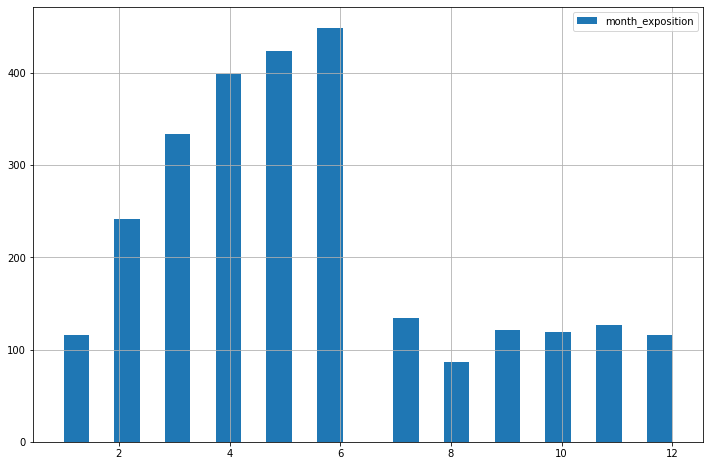

In [175]:
first_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [176]:
second_year = data.query('year_exposition == 2017')

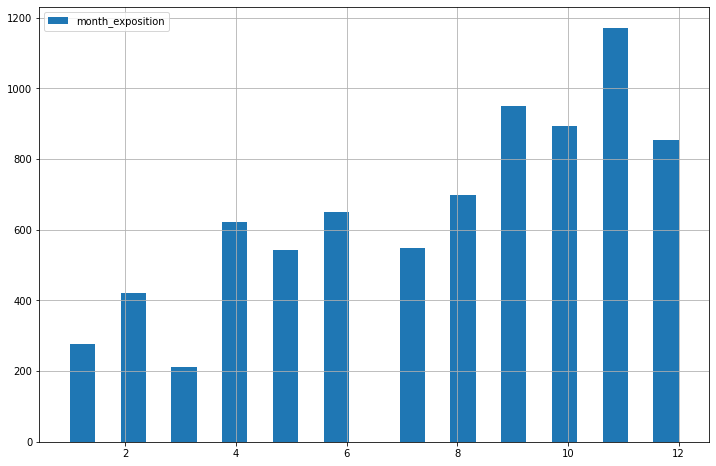

In [177]:
second_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [178]:
third_year = data.query('year_exposition == 2018')

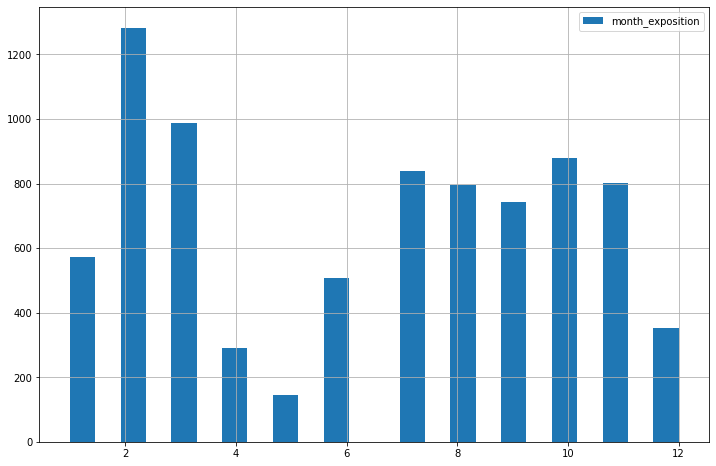

In [179]:
third_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [180]:
fourth_year = data.query('year_exposition == 2019')

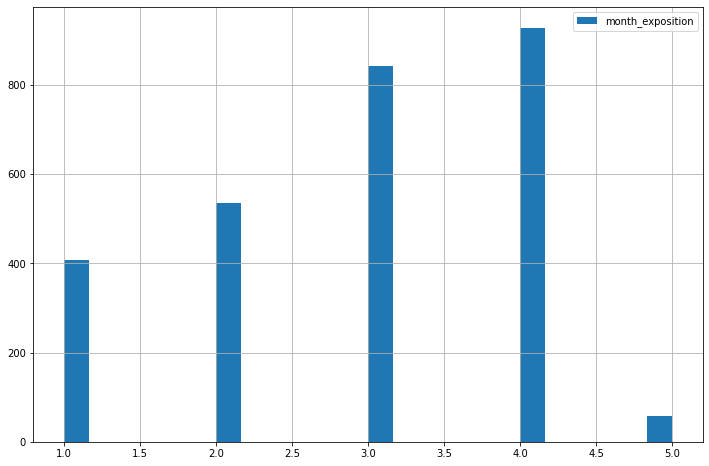

In [181]:
fourth_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

**Построим гистограмму:**

<AxesSubplot:>

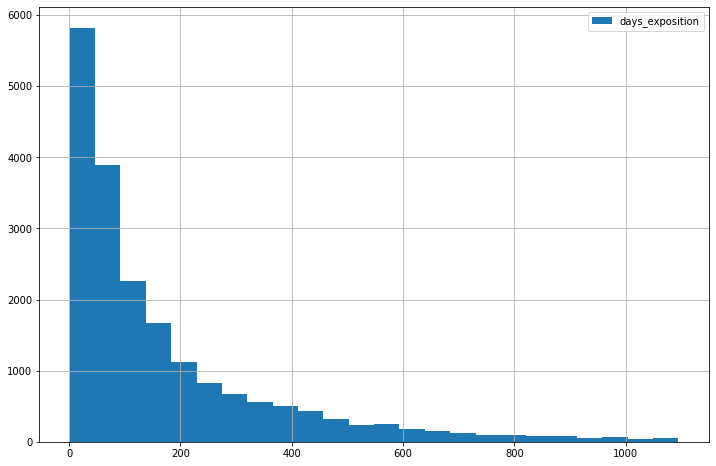

In [182]:
data['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True)

**По этой гистограмме мы видим, что чаще всего квартиры продаются в первые 3-4 месяца после публикации объявления.**

**Посчитаем среднее и медиану:**

In [183]:
(
    data[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,days_exposition
count,"19,563.00"
min,1.00
max,"1,095.00"
median,93.00
mean,171.36



* Медианное значение подтверждает вывод, сделанный по гистограмме.
* Почему среднее получилось - 181 день, а не 547, я не понял


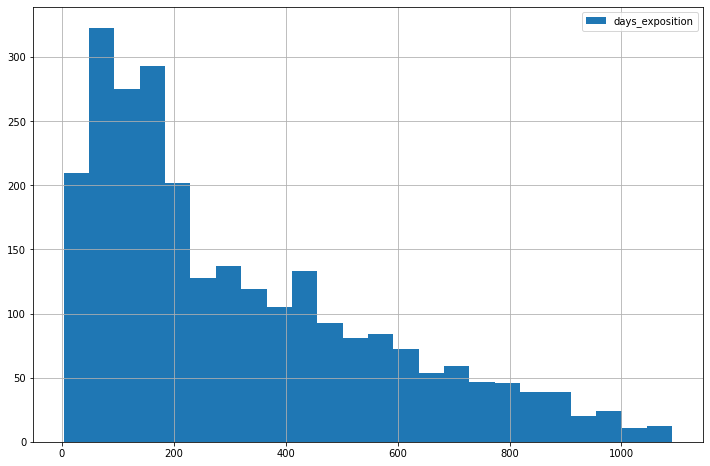

In [184]:
first_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [185]:
(
    first_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,days_exposition
count,"2,606.00"
min,3.00
max,"1,091.00"
median,229.50
mean,316.42


**В 2016-м году недвижимость чаще продавалась в течение 7,5 месяцев**

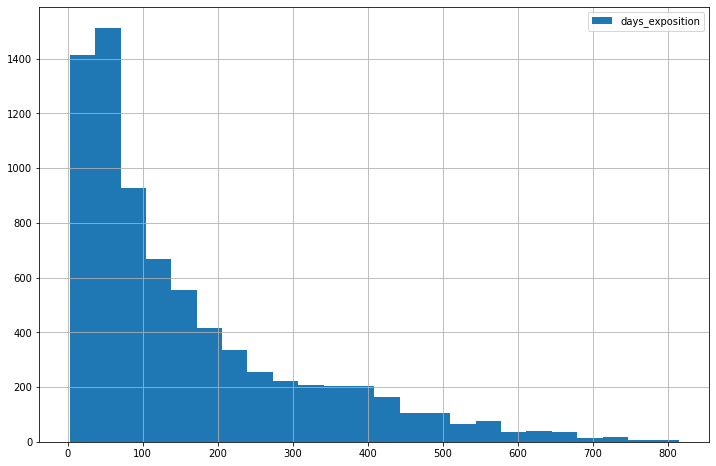

In [186]:
second_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [187]:
(
    second_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,days_exposition
count,"7,596.00"
min,3.00
max,814.00
median,103.00
mean,158.57


**В 2017-м году недвижимость чаще продавалась в течение 3-х месяцев**

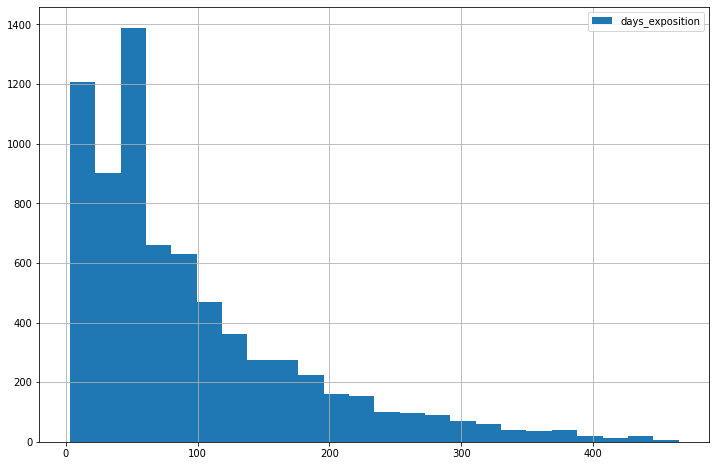

In [188]:
third_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [189]:
(
    third_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,days_exposition
count,"7,295.00"
min,3.00
max,465.00
median,64.00
mean,94.23


**В 2018-м году недвижимость чаще продавалась чуть больше 2-х месяцев**

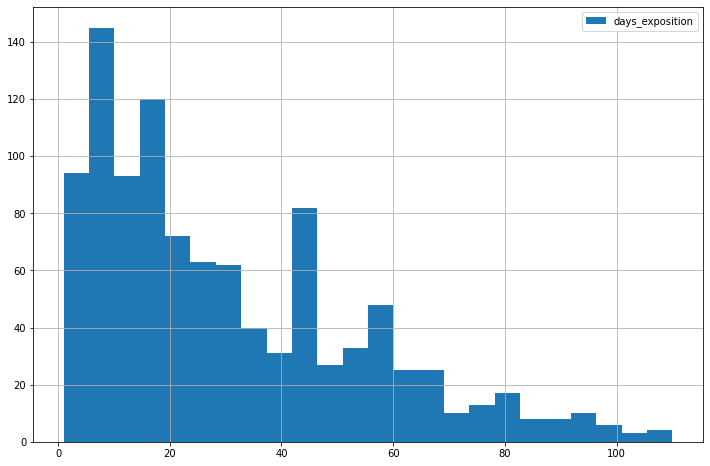

In [190]:
fourth_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [191]:
(
    fourth_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

,days_exposition
count,"1,039.00"
min,1.00
max,110.00
median,23.00
mean,30.73


**В 2019-м году недвижимость чаще продавалась меньше чем за месяц, но 2019, по данным - год неполный.**

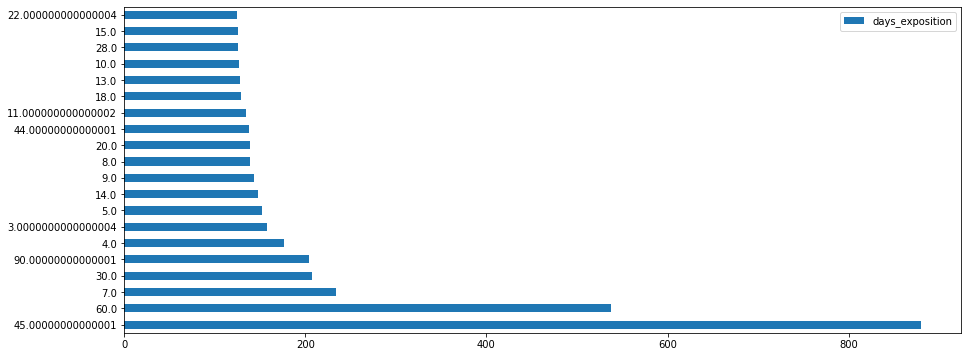

In [192]:
# check
# Моды на реальных данных
   
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

**Прочитал условия размещения объявлений на Яндекс Недвижимости. Первое и единственное, что "бросилось в глаза" - это срок бесплатного размещения, который для СПБ равен 120 дням. Этот срок совпадает со средним сроком продажи недвижимости за 2017 и 2018 годы. Возможно при окончании срока бесплатного размещения люди просто удаляют объявления. А те объявления, что задерживаются в базе больше 4-х месяцев - платные.**

In [193]:
(
    data[['days_exposition', 'rooms', 'total_area', 'ceiling_height', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .quantile([0.0012, .25, .5, .75, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,days_exposition,rooms,total_area,ceiling_height,last_price,living_area,kitchen_area,floor,floors_total
0.0012,3.00,0.00,23.50,2.45,"850,000.00",12.00,5.00,1.00,2.00
0.25,44.00,1.00,40.00,2.60,"3,450,000.00",19.00,7.30,2.00,5.00
0.5,93.00,2.00,52.00,2.65,"4,600,000.00",30.00,9.00,4.00,9.00
0.75,224.00,3.00,68.33,2.70,"6,611,250.00",42.00,11.20,8.00,16.00
0.9988,"1,078.00",6.00,220.00,4.00,"43,000,000.00",140.00,36.00,25.00,27.00


* Быстрее всего продаются двушки с площадью 50-60 кв. метров, с высотой потолков 2,7 м и стоимостью 5-6 млн, неходящиеся не на первых и не на последних этажах.
* Дольше продаются многокомнатные пентхаусы на 27 этаже за 30 млн и с высотой потолков 4 метра.

### Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта? Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией используем сводные таблицы.

**Построим графики, которые покажут зависимость цены от указанных ниже параметров:**

**Зависимость цены от удалённости от центра:**

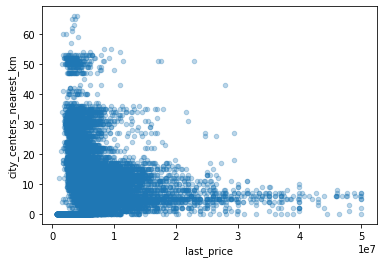

In [194]:
data.plot(x='last_price', y='city_centers_nearest_km', kind='scatter', alpha=0.3);

In [195]:
print(data['last_price'].corr(data['city_centers_nearest_km']))

-0.03553644374199457


По графику  выше и по коефициенту Пирсона можно сказать, что стоимость недвижимости не зависит от удаления от центра. Но я думаю, что что-то сделано некорректно. Прошу подсказать, как сделать правильно...

**Зависимость цены от общей площади:**

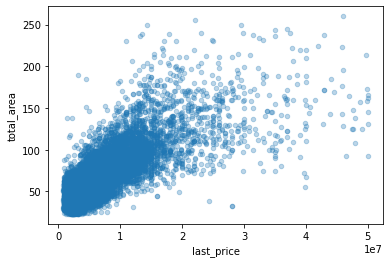

In [196]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

In [197]:
print(data['last_price'].corr(data['total_area']))

0.7670680068992025


* С увеличением прощади помещения растет его цена. Прямая кореляция, зависимость сильная.

**Зависимость цены от жилой площади:**

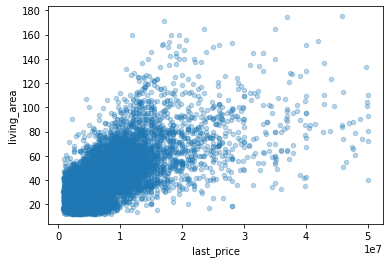

In [198]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3);

In [199]:
print(data['last_price'].corr(data['living_area']))

0.677114927753543


* Чем больше жилая площадь, чем выше стоимость помещения. Кореляция прямая высокая, но ниже, чем кореляция с общей площадью.

**Зависимость цены от площади кухни:**

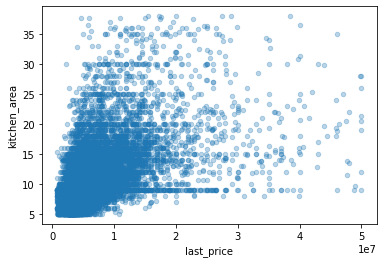

In [200]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3);

In [201]:
print(data['last_price'].corr(data['kitchen_area']))

0.5377151851238247


* С увеличением площади кухни, растёт стоимость недвижимости. Но кореляция ниже, чем в случаях выше.

**Зависимость стоимости недвижимости от количества комнат:**

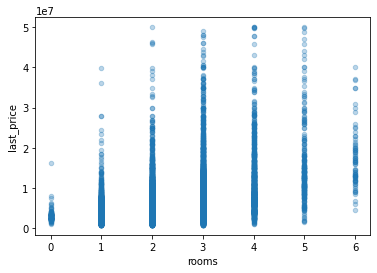

In [202]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);

In [203]:
print(data['last_price'].corr(data['rooms']))

0.4760352065513418


* С увеличением количества комнат, растёт стоимость недвижимости. Кореляция прямая, но не очень сильная.

**Зависимость стоимости от типа этажа, на котором расположена квартира (первый, последний, другой):**

* Создаю числовой столбец, характеризующий категорию этажа

In [204]:
def categorize_floor(floor):
    """
    Возвращает группу по значению этажа floor, используя правила:
    - '1', если floor == первый;
    - '2', если floor == последний;
    - '3', если floor == другой;

    """
    
    if floor == 'первый':
        return 1
    if floor == 'последний':
        return 2
    if floor == 'другой':
        return 3


In [205]:
data['floor_type_number'] = data['floor_type'].apply(categorize_floor)

In [206]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,floor_type_number
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16,3
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14,3
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой,0,3
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.06,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой,12,3
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,87454.76,2,5,2018,другой,0,3
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой,15,3
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00,127525.25,3,11,2017,другой,14,3
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.00,51677.00,0.00,NaN,0.00,NaN,7.00,75000.00,0,8,2018,другой,52,3
12,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00,72037.04,3,6,2016,последний,0,2


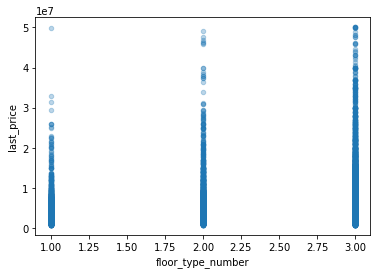

In [207]:
data.plot(x='floor_type_number', y='last_price', kind='scatter', alpha=0.3);

In [208]:
print(data['last_price'].corr(data['floor_type_number']))

0.10619807965847222


* От типа этажа стоимость помещения зависит минимально. Но недвижимость не на первом и не на последнем этажах всё таки немного дороже.

**Исследуем зависимость стоимости недвижимости от дня, месяца и года размещения:**

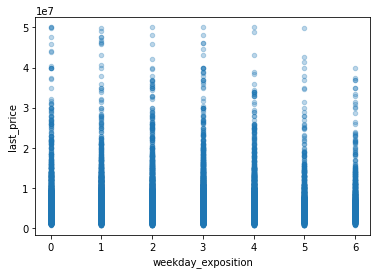

In [209]:
data.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.3);

In [210]:
print(data['last_price'].corr(data['weekday_exposition']))

-0.018261573860803463


* Кореляция почти нулевая. Зависимости стоимости жилья от дня недели размещения объявления почти нет.

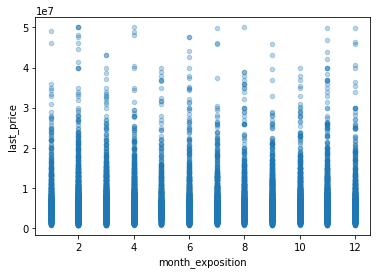

In [211]:
data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.3);

In [212]:
print(data['last_price'].corr(data['month_exposition']))

-0.0009058821888382563


* Зависимость стоимости недвижимости от месяца размещения объявления о её продаже очень низкая, но видно, что в течение года недвижимость немного дорожает.

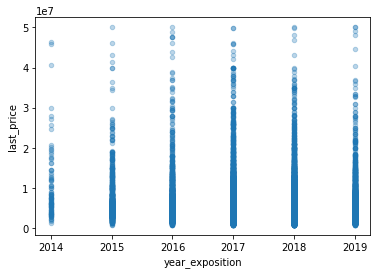

In [213]:
data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.3);

In [214]:
print(data['last_price'].corr(data['year_exposition']))

-0.030736066272910378


* Кореляция стоимости жилья и года размещения объявления почти нулевая.

**Для подготовки данных перед визуализацией используем сводную таблицу:**

In [215]:
data_pivot = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_day_exposition'], aggfunc='mean')

In [216]:
data_pivot

,kitchen_area,living_area,rooms,total_area
last_price,,,,
800000,7.94,23.91,1.67,42.93
820000,7.00,29.50,2.00,45.00
850000,8.15,28.26,1.96,46.65
860000,7.00,30.50,1.50,40.00
869000,6.00,17.50,1.00,31.90
...,...,...,...,...
48763000,9.00,90.03,5.00,157.00
49000000,9.70,73.90,3.00,125.00
49798000,28.00,133.00,4.00,214.00


**По полученной сводной таблице строю матрицу диаграмм рассеивания:**

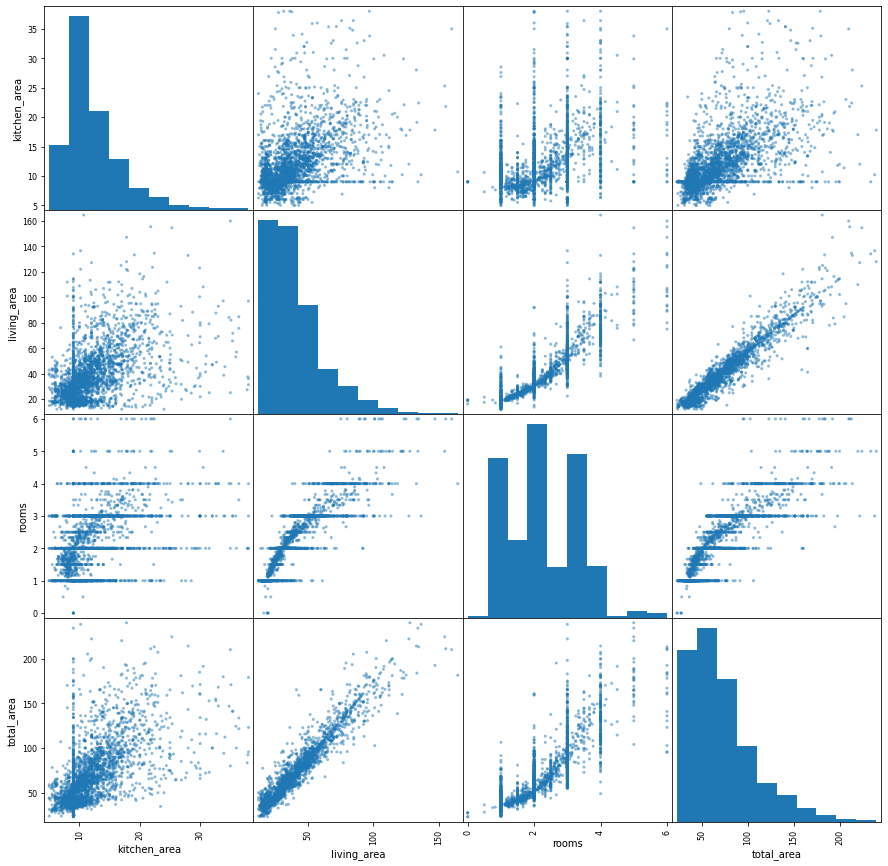

In [217]:
pd.plotting.scatter_matrix(data_pivot, figsize=(15, 15));

In [218]:
print(data_pivot.corr()) 

              kitchen_area  living_area  rooms  total_area
kitchen_area          1.00         0.45   0.40        0.58
living_area           0.45         1.00   0.88        0.96
rooms                 0.40         0.88   1.00        0.84
total_area            0.58         0.96   0.84        1.00


In [219]:
columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type_number', 'weekday_exposition', 'month_exposition', 'year_exposition']
subset = data[columns]

In [220]:
subset.corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor_type_number,weekday_exposition,month_exposition,year_exposition
last_price,1.00,0.77,0.68,0.54,0.48,0.11,-0.02,-0.00,-0.03
total_area,0.77,1.00,0.94,0.53,0.79,0.02,-0.02,0.00,-0.07
living_area,0.68,0.94,1.00,0.34,0.86,-0.02,-0.01,-0.00,-0.06
kitchen_area,0.54,0.53,0.34,1.00,0.19,0.11,-0.01,0.01,-0.05
rooms,0.48,0.79,0.86,0.19,1.00,-0.06,-0.01,-0.01,-0.04
floor_type_number,0.11,0.02,-0.02,0.11,-0.06,1.00,0.00,0.01,0.02
weekday_exposition,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,1.00,0.01,-0.01
month_exposition,-0.00,0.00,-0.00,0.01,-0.01,0.01,0.01,1.00,-0.27
year_exposition,-0.03,-0.07,-0.06,-0.05,-0.04,0.02,-0.01,-0.27,1.00


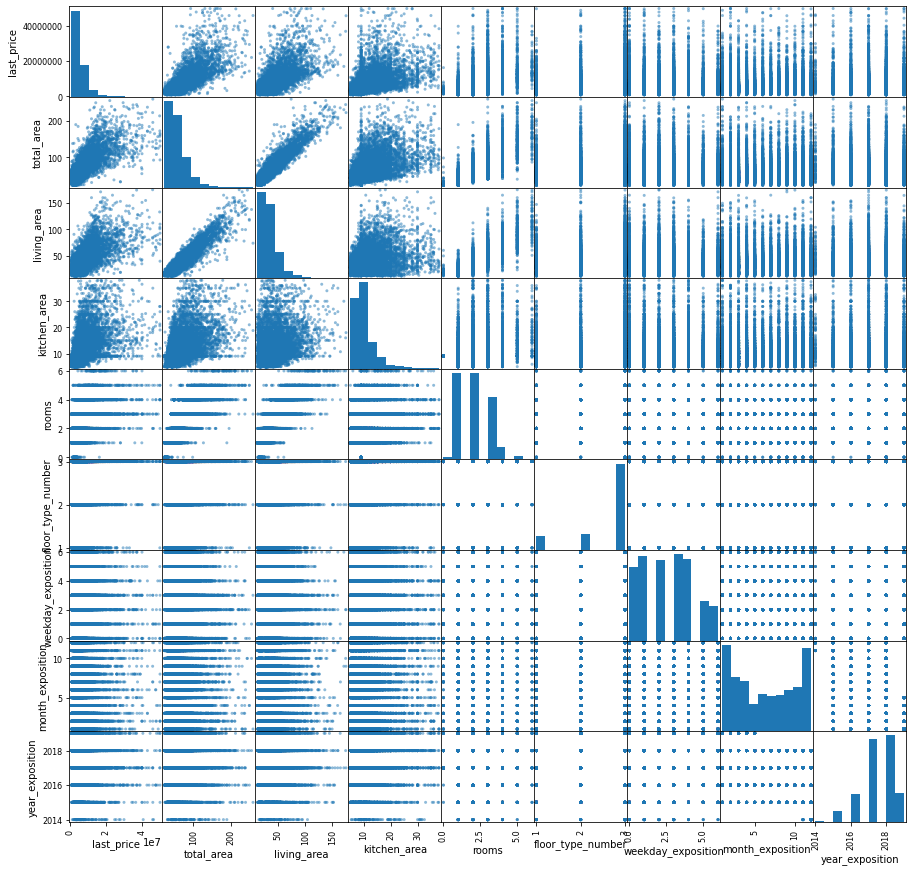

In [221]:
# check
pd.plotting.scatter_matrix(subset, figsize=(15, 15));

* На левой верхней гистограмме видно, что большинство кухонь иеют площадь от 7 до 15 кв.м.
* В ячейке ниже показана связь между жилой площадью помещения и площадью кухни. Прослеживается нечеткая связь - чем больше жилая площадь, тем больше площадь кухни. Возможно нечеткость связи связана с тем, что сейчас встречаются квартиры - студии или квартиры евро-двушки, где одна из комнат совмещена с кухней.
* Видно, что чем больше количество комнат, тем больше площадь кухни. Но т.к. комнаты и кухни могут быть совмещены, встречаются отклонения.
* В левой нижней ячейке видна связь между общей площадью помещения и площадью кухни. Видно, что при увеличении общей площади, возрастает и площадь кухни.
* Более распространена недвижимость с жилой площадью до 50 кв. м. и общец площадью до 80 кв. м. Всё, что больше по площади - встречается менее часто.
* Более распространены 1, 2, 3-х комнатные квартиры. На графике мы видим промежуточные значения, возможно это связано с наличием различных вариантов планировок.
* Количество комнат, жилая площадь и площадь кухни растут с ростом площади помещения.
* С увеличением количества комнат, растёт стоимость недвижимости

**Группирую стоимость по дням недели, считаю среднее и медиану:**

In [222]:
price_grouped_by_weekday = data.pivot_table(index='weekday_exposition', values=['last_price'], aggfunc=['median', 'mean'])

In [223]:
price_grouped_by_weekday

,median,mean
,last_price,last_price
weekday_exposition,,
0,4630000,5903169.42
1,4700000,5852787.24
2,4700000,5988248.38
3,4600000,5941142.66
4,4550000,5706623.45
5,4545000,5634856.51
6,4550000,5675652.91


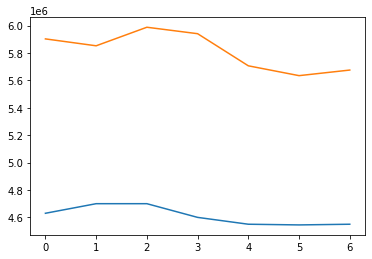

In [224]:
plt.plot(price_grouped_by_weekday);

**Группирую стоимость по месяцам, считаю среднее и медиану:**

In [225]:
price_grouped_by_month = data.pivot_table(index='month_exposition', values=['last_price'], aggfunc=['median', 'mean'])

In [226]:
price_grouped_by_month

,median,mean
,last_price,last_price
month_exposition,,
1,4600000,5937451.83
2,4637000,5917706.81
3,4605000,5743929.05
4,4795000,5858309.82
5,4500000,5878979.94
6,4400000,5741360.06
7,4600000,5787185.35
8,4550000,5875528.10


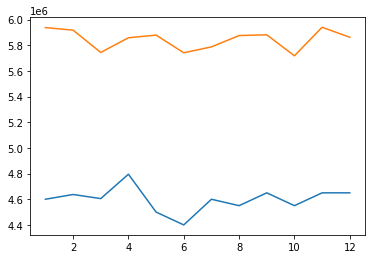

In [227]:
plt.plot(price_grouped_by_month);

**Группирую стоимость по годам, считаю среднее и медиану:**

In [228]:
price_grouped_by_year = data.pivot_table(index='year_exposition', values=['last_price'], aggfunc=['median', 'mean'])

In [229]:
price_grouped_by_year

,median,mean
,last_price,last_price
year_exposition,,
2014,7282500,10239468.24
2015,5100000,6695065.99
2016,4500000,5978253.17
2017,4500000,5726507.43
2018,4597000,5647087.87
2019,5046000,6163699.74


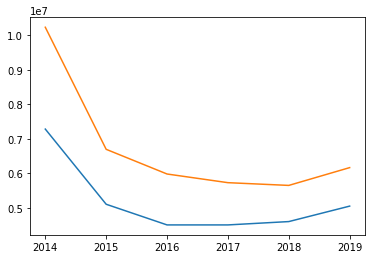

In [230]:
plt.plot(price_grouped_by_year);

**Ниже буду пытаться выполнить задание по подсказкам из ячейки сверху:**

* Создаю первую таблицу, в которой группирую объявления по дням недели и считаю среднее и медиану для общей площади:

In [231]:
total_area_grouped_by_weekday = data.pivot_table(index='year_exposition', values=['total_area'], aggfunc=['median', 'mean'])

In [232]:
total_area_grouped_by_weekday

,median,mean
,total_area,total_area
year_exposition,,
2014,74.75,80.70
2015,58.00,65.70
2016,53.00,60.08
2017,51.50,58.05
2018,50.70,56.68
2019,51.70,57.03


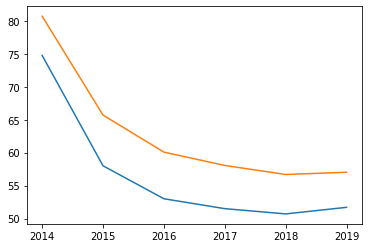

In [233]:
plt.plot(total_area_grouped_by_weekday);

**По графику выше видно, что с 2014 года по 2019 год средняя площадь недвижимости, выставленной на продажу, уменьшилась примерно на 20 кв. метров.**

* Создаю вторую таблицу, в которой группирую объявления по дням недели их размещения и считаю их количество:

In [234]:
quantity_grouped_by_weekday = data.pivot_table(index='year_exposition', values=['total_area'], aggfunc=['count'])

In [235]:
quantity_grouped_by_weekday

,count
,total_area
year_exposition,
2014,98
2015,1007
2016,2667
2017,7842
2018,8200
2019,2770


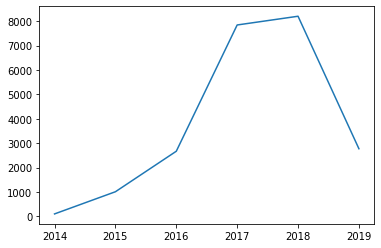

In [236]:
plt.plot(quantity_grouped_by_weekday);

**По графику выше видно, что с 2014 по 2019 год значительно увелилилось количество недвижимости, выставленной на продажу. Спад на графике в 2019-м году связан с тем, что мы имеем данные не за полный 2019-й год.**

**Полагаясь на графики выше, я сделал вывод, что в период с 2014 по 2019 годы в исследуемых населённых пунктах значительно выросло количество объявлений о продаже недвижимости, но при этом площадь этой недвижимости снизилась, в среднем, примерно на 20 квадратных метров, что способствовало снижению цен.**

### Вывод:

**Выводы ниже делаю полагаясь на матрицу рассеивания:**

* Цена на недвижимость зависит от общей площади. Чем больше площадь помещения, тем выше цена. Более чётко это видно в низком ценовом сегменте, с ростом площади недвижимости зависимость слабеет. Коэффициент корреляции 0.77 - положительный и достаточно высокий.

* Цена на недвижимость зависит от жилой площади, аналогично ситуации с общей площадью, но зависимость немного слабее. Коефициент кореляции Пирсона - 0.68.

* С площадью кухни цена корелирует слабее - коефициент кореляции равен 0.54, но зависимость есть.

* От количества комнат в квартире цена так же зависит - коефициент кореляции равен 0.48.

* От типа этажа зависимость цены есть, но небольшая - коефициент кореляции равен всего 0.11. Недвижимость на первом и на последнем этажах, как правило, дешевле.

* От дня недели и месяца размещения стоимость недвижимость зависит минимально, но по годам можно увидеть тенденцию к снижению средней стоимости недвижимости, связанную с ростом количества объявлений о продаже недвижимости и уменьшением средней площади этой недвижимости.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

**Подготовим сводную таблицу:**

In [237]:
locality_rate = data.pivot_table(index='locality_name', values='price_one_meter', aggfunc=['count', 'mean']).reset_index(level='locality_name')

In [238]:
locality_rate.columns

MultiIndex([('locality_name',                ''),
            (        'count', 'price_one_meter'),
            (         'mean', 'price_one_meter')],
           )

In [239]:
locality_rate

,locality_name,count,mean
,,price_one_meter,price_one_meter
0,Агалатово,4,71214.47
1,Александровская,2,70262.81
2,Алексеевка,1,22222.22
3,Аннино,16,63322.64
4,Аро,3,51412.42
...,...,...,...
285,Щеглово,24,53133.82
286,Юкки,4,76407.15
287,Яльгелево,5,55208.49


In [240]:
locality_rate.columns = ['Локация', 'Количество', 'Среднее']

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [241]:
locality_rate.sort_values(by='Количество', ascending=False).sort_values(by='Среднее', ascending=False).reset_index(drop=True).head(10)

,Локация,Количество,Среднее
0,Зеленогорск,23,116185.26
1,Лисий Нос,2,113728.35
2,Санкт-Петербург,14962,111510.09
3,Бор,1,105539.26
4,Репино,4,104238.61
5,Пушкин,351,102666.35
6,Сестрорецк,177,102096.58
7,Мистолово,11,98549.98
8,Левашово,1,96997.69
9,Кудрово,458,95088.26


In [242]:
# check
top_ten = locality_rate.sort_values(by='Количество', ascending=False).head(10)

In [243]:
top_ten

,Локация,Количество,Среднее
217,Санкт-Петербург,14962,111510.09
140,Мурино,559,85679.23
99,Кудрово,458,95088.26
284,Шушары,427,78105.40
32,Всеволожск,389,68760.78
196,Пушкин,351,102666.35
85,Колпино,335,75216.71
164,Парголово,310,89995.90
39,Гатчина,301,68853.66
33,Выборг,228,58236.09


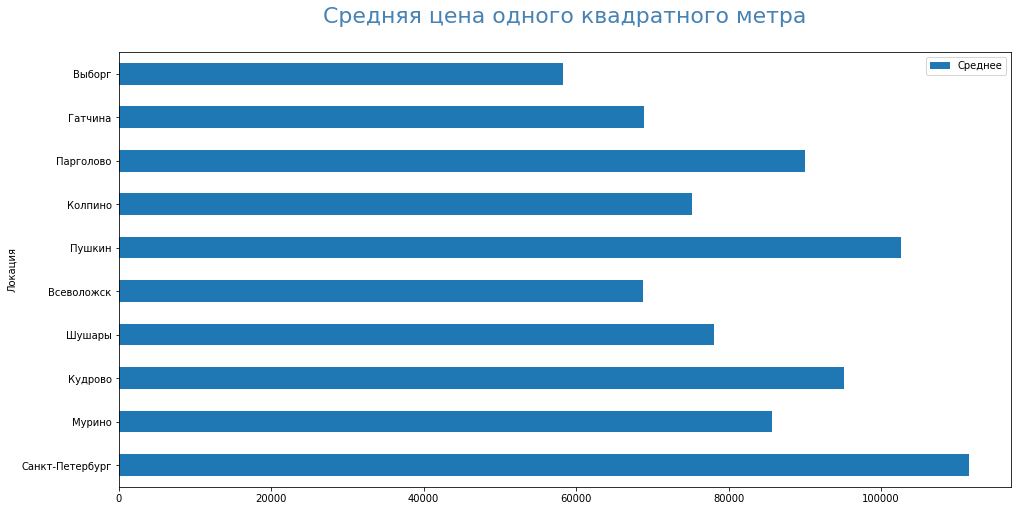

In [244]:
top_ten.plot(x="Локация", y="Среднее", kind="barh", rot=0, fontsize=10, figsize=(16,8)).set_title('Средняя цена одного квадратного метра' + "\n", fontsize = 22, color = 'SteelBlue');

**Выделим населённые пункты с самой высокой стоимостью квадратного метра:**

In [245]:
locality_rate.sort_values(by='Среднее', ascending=False).head(10)

,Локация,Количество,Среднее
61,Зеленогорск,23,116185.26
116,Лисий Нос,2,113728.35
217,Санкт-Петербург,14962,111510.09
17,Бор,1,105539.26
207,Репино,4,104238.61
196,Пушкин,351,102666.35
230,Сестрорецк,177,102096.58
135,Мистолово,11,98549.98
110,Левашово,1,96997.69
99,Кудрово,458,95088.26


**Выделим населённые пункты с самой низкой стоимостью квадратного метра:**

In [246]:
locality_rate.sort_values(by='Среднее').head(10)

,Локация,Количество,Среднее
125,Малая Романовка,1,12724.55
232,Сижно,1,13709.68
56,Житково,2,14956.28
121,Лужайка,1,15000.00
288,Ям-Тесово,1,15094.34
158,Оредеж,2,15563.84
185,Почап,1,16037.74
53,Ефимовский,2,16268.84
16,Большой Сабск,1,16453.38
282,Шугозеро,1,16608.39


### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

* Отфильтруем датафрейм по Санкт-Петербургу:

In [247]:
spb_df = data.loc[data['locality_name'] == 'Санкт-Петербург']

**Увидел, что квартира с индексом 748 имеет очень высокую цену.**

* Удалим по индексу строку с выбросом на 27-м километре:

In [248]:
spb_df = spb_df.drop(748)

* Проверяю выбросы на 27-м км:

* Проверим наличие пропусков в столбце:

In [249]:
spb_df['city_centers_nearest_km'].isna().sum()

0

* Проверим тип данных:

In [250]:
spb_df['city_centers_nearest_km'].dtypes

dtype('int64')

* Проферяю объём датафрейма:

In [251]:
spb_df.shape

(14961, 29)

* Удаляю значения равные нулю, чтобы они не влияли на график:

In [252]:
spb_df = spb_df.query('city_centers_nearest_km > 0')

* Ещё раз проверяю объём датафрейма:

In [253]:
spb_df.shape

(14889, 29)

* Посмотрим на список уникальных значений в столбце "Расстояние до центра":

In [254]:
spb_df['city_centers_nearest_km'].unique()

array([16, 14, 12, 15, 11, 13, 10,  2,  4, 17,  7,  5,  8,  9,  6, 21,  3,
       18,  1, 24, 26, 23, 22, 25, 20, 28, 19, 27, 29])

In [255]:
display(spb_df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,floor_type_number
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16,3
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14,3
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.06,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой,12,3
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой,15,3
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00,127525.25,3,11,2017,другой,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,False,False,9.10,2,Санкт-Петербург,17284.00,16081.00,1.00,353.00,2.00,652.00,29.00,100566.57,2,2,2018,другой,16,3
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,False,False,6.00,0,Санкт-Петербург,20151.00,6263.00,1.00,300.00,0.00,NaN,15.00,105769.23,3,7,2018,другой,6,3
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.60,1,Санкт-Петербург,19424.00,4489.00,0.00,NaN,1.00,806.00,519.00,129903.98,3,10,2016,другой,4,3
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN,72490.85,1,3,2017,другой,4,3


* Выведем на экран среднюю цену 1 кв.м.:

In [256]:
spb_df['price_one_meter']

0       120370.37
2        92785.71
7       110544.69
9        88524.59
10      127525.25
           ...   
23689   100566.57
23690   105769.23
23691   129903.98
23694    72490.85
23697   149511.40
Name: price_one_meter, Length: 14889, dtype: float64

In [257]:
print(spb_df['city_centers_nearest_km'].corr(spb_df['price_one_meter']))

-0.34206108797159


**Создаю сводную таблицу для построения по нейлинейного графика:**

In [258]:
spb_df_pivot = spb_df.pivot_table(index='city_centers_nearest_km', values='price_one_meter', aggfunc='mean')

In [259]:
spb_df_pivot.head(5)

,price_one_meter
city_centers_nearest_km,
1,145488.60
2,135029.27
3,118098.93
4,126715.31
5,134250.90


**Строю линейный график:**

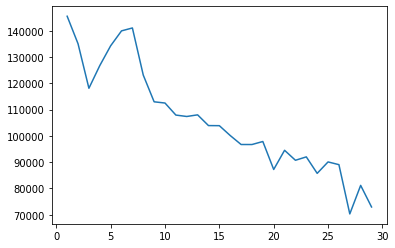

In [260]:
plt.plot(spb_df_pivot);

**На графике выше видно как снижается цена на недвижимость в Санкт-Петербурге при удалении от центра. Так же видны пик и провал в центре, которые я постараюсь объяснить ниже.**

**Ниже приведён еще один график, подсмотренный в канале project в пачке. На нём так же можно проследить зависимость цены на 1 кв. м. недвижимости от расстояния до центра Петербурга:**

In [261]:
spb_df_final = spb_df.groupby('city_centers_nearest_km')['price_one_meter'].mean().sort_values(ascending=False)

In [262]:
display(spb_df_final.head(5));

city_centers_nearest_km
1   145488.60
7   141031.56
6   139924.13
2   135029.27
5   134250.90
Name: price_one_meter, dtype: float64

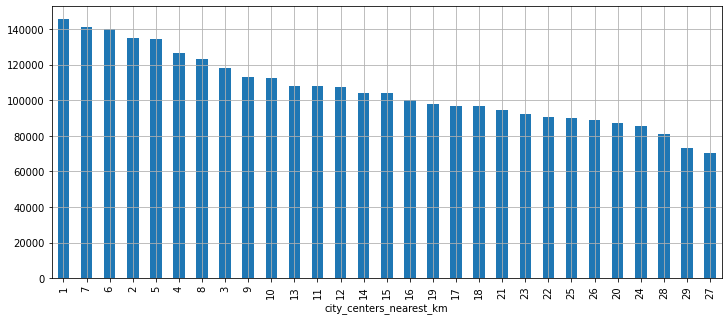

In [263]:
spb_df_final.plot(x='city_centers_nearest_km', y='price_one_meter', figsize=(12,5), kind='bar', rot=90, grid=True);

* Чем ближе к центру, тем выше стоимость недвижимости.

In [264]:
quantity_by_categories = spb_df.groupby(['city_centers_nearest_km','floor_type']).agg({'floor_type': ['count']})

In [265]:
display(quantity_by_categories.head(15));

floor_type
                                        count
city_centers_nearest_km floor_type           
1                       другой            102
                        первый             19
                        последний          39
2                       другой            153
                        первый             43
                        последний          68
3                       другой            193
                        первый             52
                        последний          72
4                       другой            449
                        первый             76
                        последний         104
5                       другой            626
                        первый             73
                        последний         122

**По получившейся табличке видно, что в трёх километрах от центра города больше недвижимости продавалось на первых и последних этажах, а недвижимость на этих этажах как правило, дешевле, чем на других. Начиная с четвёртого километра больше недвижимости относится к типу "другой", соответственно и цена на данных тип недвижимости выше. Думаю, что спад и подъём в центре связаны с этим.**

### Общий вывод

**Мы выполнили предобработку данных и изучили их, нашли некоторые особенности и зависимости, которые существуют на рынке недвижимости:**

    * На этапе предобработки данных мы устранили в них пропуски и аномалии. 
    * Изменили типы данных на такие, с которыми возможно производить арифметические операции. 
    * Устранили дубликаты.
    * Визуализировали данные до и после обработки для того чтобы увидеть закономерности.

**В ходе исследовательского анализа были сделаны следующие выводы:**

    * Площадь большинства объектов недвижимости колеблется в пределах 20 - 260 квадратных метров. Чем больше площадь квартиры, тем она уникальнее.
    * Чаще жилая площадь колеблется в пределах от 15 до 55 квадратных метров.
    * Чаще всего встречаются кухни с площадью от 5 до 15 квадратных метров.
    * Чем дешевле квартиры, тем чаще они встречаются.
    * Больше всего однокомнатных и двухкомнатных квартир. Квартиры с числом комнат больше 6 встречаются крайне редко.
    * Чаще всего встречаются квартиры с высотой потолков 2,7 метра. Высота потолков варьируется от 2,4 до 4-х метров. Есть редкие исключения.
    * Больше всего квартир располагаются на этажах от 1-го до 5-го. Квартиры на верхних этажах встречаются реже, чем на нижних.
    * Больше всего квартир располагается не на первом и не на последнем этажах. На последнем этаже квартир всё же немного больше, чем на первом.
    * Чаще всего встречаются пяти и девятиэтажные дома.
    * Больше всего квартир находятся на расстоянии от 9 до 17-ти километров от центра города. Так же виден пик в 5-ти километрах от центра. С удалением от центра количество недвижимости падает.
    * Ближе 5-ти километров от аэропорта жилья не найти, зато от 5-ти до 50 километров от него жилья довольно много.
    * Парки в основном располагаются в 500 метрах от жилья.
    * Чаще объявлениия о продаже недвижимости размещают по будням, чем по выходным. Примерно в 2 раза чаще.
    * Меньше всего недвижимости продаётся в декабре, январе и мае. Больше продают в феврале и ноябре.
    
**В процессе анализа столбца (days_exposition) были выявлены следующие закономерности:**
 
    * Чаще квартиры продаются в первые 3-4 месяца после публикации объявления. 
    * Быстрее всего продаются двушки с площадью 50-60 кв. метров, с высотой потолков 2,7 м и стоимостью 5-6 млн, неходящиеся не на первых и не на последних этажах.
    * Дольше продаются многокомнатные пентхаусы на 27 этаже за 30 млн и с высотой потолков 4 метра.
    * В условиях размещения объявлений на Яндекс Недвижимости срок бесплатного размещения, для СПБ равен 120 дням. Этот срок совпадает со средним сроком продажи недвижимости за 2017 и 2018 годы. Возможно при окончании срока бесплатного размещения люди просто удаляют объявления или объявления удаляются по техническим причинам. А те объявления, что задерживаются в базе больше 4-х месяцев - платные. Выделяются моды на 45 и 60 дней, а значения на 44 и 45 дней, явно имеет техническую причину снятия, из-за формата числа - они могут искажать реальный расчет скорости продажи квартиры, поэтому при анализе их можно временно исключать из датафрейма.
    * В период с 2014 по 2019 годы в исследуемых населённых пунктах значительно выросло количество объявлений о продаже недвижимости, но при этом площадь этой недвижимости снизилась, в среднем, примерно на 20 квадратных метров, что способствовало снижению цен.
    
**На общую (полную) стоимость объекта больше всего влияют следующие факторы:**

    * С увеличением прощади помещения растет его цена.
    * Чем больше жилая площадь, чем выше стоимость помещения. 
    * С увеличением площади кухни, растёт стоимость недвижимости.
    * От типа этажа стоимость помещения зависит минимально. Но недвижимость не на первом и не на последнем этажах немного дороже.
    * Зависимости стоимости жилья от дня недели размещения объявления почти нет.
    * Зависимость стоимости недвижимости от месяца размещения объявления о её продаже очень низкая, но видно, что со временем недвижимость дешевеет по причинам описанным выше.
    * Чем ближе к центру, тем выше стоимость недвижимости. Можно проследить как снижается цена на недвижимость в Санкт-Петербурге при удалении от центра. Так же видны пик и провал в центре. В трёх километрах от центра города больше недвижимости продавалось на первых и последних этажах, а недвижимость на этих этажах как правило, дешевле, чем на других. Начиная с четвёртого километра больше недвижимости относится к типу "другой", соответственно и цена на данных тип недвижимости выше. Думаю, что спад и подъём в центре связаны с этим.